    MACHINE EXERCISE NO. 3 Cross-Validation and Hyperparameter Tuning
        Joshua Dela Cruz
        2023-02911

    Note: Summary of results are presented in the end, all sections such as 'Classification' and 'Regression' are searchable.   
    
    PROBLEM: Wine Quality 
    
    The datasets is related to red variants of the Portuguese "Vinho Verde" wine.
    Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
    
    These datasets can be viewed as classification or regression tasks.
    The classes are ordered and not balanced (e.g. there are munch more normal wines than
    excellent or poor ones). Outlier detection algorithms could be used to detect the few excellentor poor wines. There is also no certainty that all input variables are relevant. 

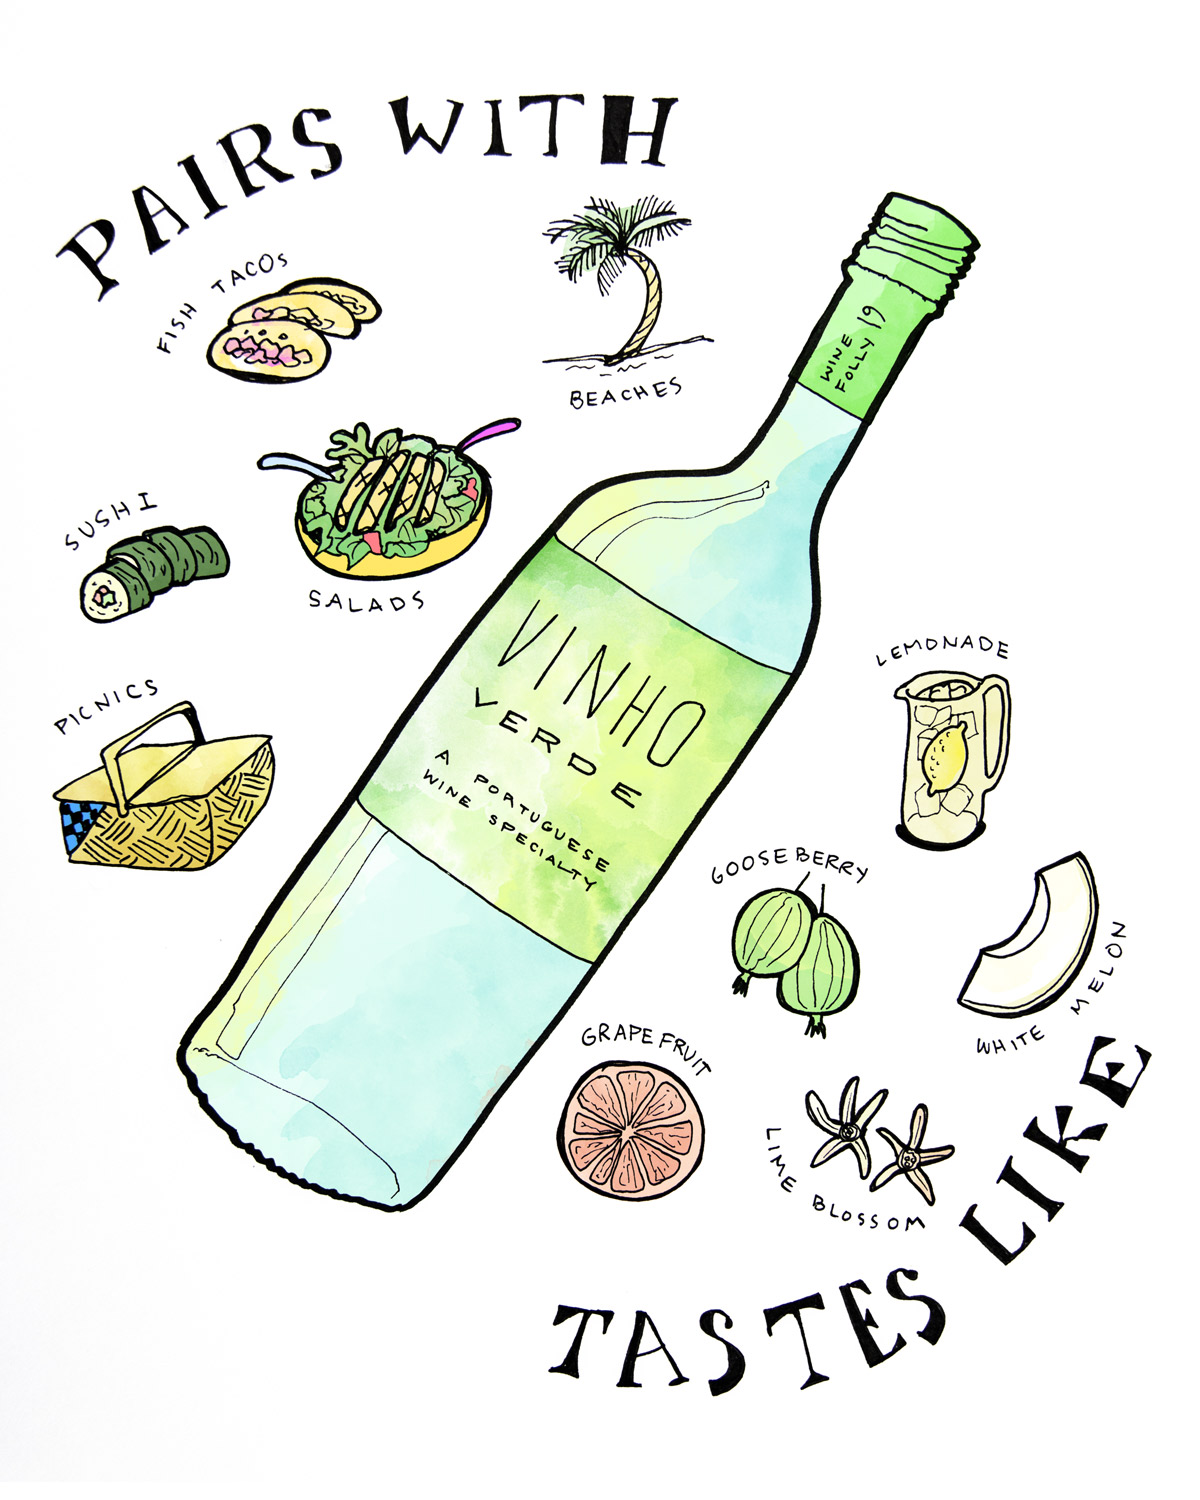

    Image from: 
    https://winefolly.com/deep-dive/vinho-verde-the-perfect-poolside-wine-from-portugal/

    Table of Contents
    
    1  General Resources
            1.0.1  Libraries
            1.0.2  References
            1.0.3  Dataset
                1.0.3.1  Import
                1.0.3.2  Exploratory Analysis
                1.0.3.3  Visualization
    2  (a) CLASSIFICATION
        2.1  Experiment 1: Original Dataset
            2.1.1  Data Preparation
                2.1.1.1  Label Setup
                2.1.1.2  Obtain Features and Target
                2.1.1.3  Data Partitioning
            2.1.2  Default Model
                2.1.2.1  Fit Training
                2.1.2.2  Testing
            2.1.3  Model Optimization
                2.1.3.1  Grid Search
                2.1.3.2  OneVsOne SVC Classifier
                2.1.3.3  OneVsRest SVC Classifier (not used)
                2.1.3.4  ECOC SVC Classifier (not used)
                2.1.3.5  SVC Best Model
            2.1.4  Feature Selection
                2.1.4.1  Manual Selection based on Most Number of Outliers
                2.1.4.2  PCA
        2.2  Experiment 2: Undersampling + Oversampling
            2.2.1  Data Preparation
                2.2.1.1  Undersampling
                2.2.1.2  Obtain Features and Target
                2.2.1.3  Maintain the original ratio of Train-Test
                2.2.1.4  Oversampling
            2.2.2  Default Model
                2.2.2.1  Fit Training
                2.2.2.2  Testing
            2.2.3  Model Optimization
                2.2.3.1  Grid Search
                2.2.3.2  OneVsOne SVC Classifier
                2.2.3.3  OneVsRest SVC Classifier
                2.2.3.4  SVC Best Model
            2.2.4  Feature Selection
                2.2.4.1  Manual Selection based on Most Number of Outliers
                2.2.4.2  PCA
    3  (b) REGRESSION
        3.1  Experiment 1: Original Dataset
            3.1.1  Default Model
            3.1.2  Model Optimization
                3.1.2.1  Grid Search
                3.1.2.2  Random Search
            3.1.3  Feature Selection
                3.1.3.1  Manual Selection Based on Most Number of Outliers
                3.1.3.2  PCA
        3.2  Experiment 2: Undersampling + Oversampling
            3.2.1  Default Model
            3.2.2  Model Optimization
                3.2.2.1  Grid Search
                3.2.2.2  Random Search
            3.2.3  Feature Selection
                3.2.3.1  Manual Selection Based on Most Number of Outliers
                3.2.3.2  PCA
    4  SUMMARY
            4.0.1  EDA
            4.0.2  METHODOLOGY
            4.0.3  RESULTS

# General Resources

    Main Objective:
    Build a classifier that predicts the wine quality from the wine attributes. The wine quality is a sensory preference score from 0 (poor) to 10 (excellent), graded by experts.

### Libraries

In [1]:
# Data importation and manipulation
import os 
import pandas as pd
import numpy as np

# Model creation, calculation and test
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Data visualization, exploratory and result analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Data Preparation
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Auxilliaries
from time import time

In [2]:
color_palette = 'Reds'
distribution_line_color = sns.color_palette(color_palette)[2]

In [3]:
import warnings

# Suppress 'deprecated' warnings, added in final run to clean notebook when printing into pdf
warnings.filterwarnings("ignore")

### References

     - Data source and description: https://archive.ics.uci.edu/dataset/186/wine+quality
     - Based on the study titled "Modeling wine preferences by data mining from physicochemical properties"
    P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
    Modeling wine preferences by data mining from physicochemical properties.
    In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
     
     - Utilized ChatGPT to aid for the following codes:
         1. Identify number of outliers and extract them from the dataframe; 
         2. Manual extraction of "Weighted Average Accuracy" from the classification report;
         3. Obtain name and indices of top features from PCA; 
    
    - Most codes were from class repositories; code for using SMOTE was from a project created for the subject AI 201.

### Dataset

#### Import

In [4]:
def import_csv_dataset(file_path):
    df = pd.read_csv(file_path, header=0, encoding='latin-1', sep = ";")
    return df

In [5]:
redwine_data = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\03 Validation and Optimization\winequality-red.csv"
redwine_data_df = import_csv_dataset(redwine_data)

In [6]:
redwine_data_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
# Obtain features and target data
features_df = redwine_data_df.drop(columns=['quality'])
target_df = redwine_data_df['quality']

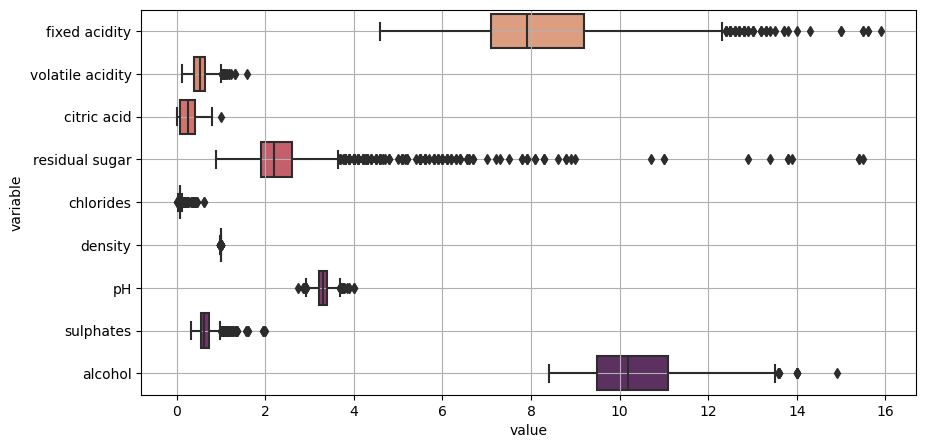

In [8]:
redwine_df_alpha = redwine_data_df.drop(columns=['total sulfur dioxide', 'free sulfur dioxide', 'quality'])

# Collect all features 
df_melted = redwine_df_alpha.melt(var_name='variable', value_name='value')

# Create a combined boxplot using Seaborn
plt.figure(figsize=(10,5))
sns.boxplot(data=df_melted, width=0.8, orient="h",x="value", y="variable", palette = 'flare')
plt.rc('axes', labelsize=15)
plt.grid()
plt.show()

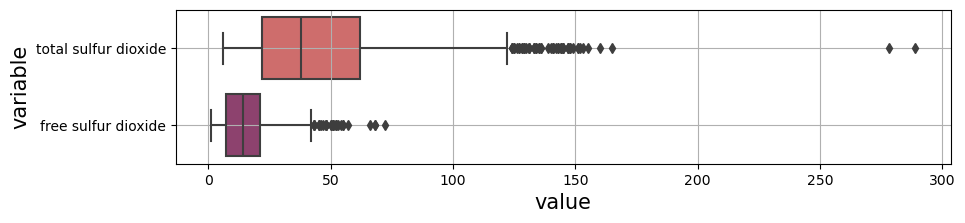

In [9]:
redwine_df_beta = redwine_data_df[['total sulfur dioxide', 'free sulfur dioxide']]

# Collect all features 
df_melted = redwine_df_beta.melt(var_name='variable', value_name='value')

# Create a combined boxplot using Seaborn
plt.figure(figsize=(10,2))
sns.boxplot(data=df_melted, width=0.8, orient="h",x="value", y="variable", palette = 'flare')
plt.rc('axes', labelsize=15)
plt.grid()
plt.show()

In [10]:
def find_outliers(df, class_column):
    outliers_count = {}
    for col in df.columns:
        if col != class_column:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers_count[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
            
    # Sort the outliers_count dictionary by value (outlier count) in descending order
    outliers_count_sorted = dict(sorted(outliers_count.items(), key=lambda x: x[1], reverse=True))
    return outliers_count_sorted

outliers_count = find_outliers(redwine_data_df, 'quality')

for col, count in outliers_count.items():
    print(f"Number of outliers in column '{col}': {count}")


Number of outliers in column 'residual sugar': 155
Number of outliers in column 'chlorides': 112
Number of outliers in column 'sulphates': 59
Number of outliers in column 'total sulfur dioxide': 55
Number of outliers in column 'fixed acidity': 49
Number of outliers in column 'density': 45
Number of outliers in column 'pH': 35
Number of outliers in column 'free sulfur dioxide': 30
Number of outliers in column 'volatile acidity': 19
Number of outliers in column 'alcohol': 13
Number of outliers in column 'citric acid': 1


#### Exploratory Analysis

In [11]:
redwine_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
redwine_data_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
redwine_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#### Visualization

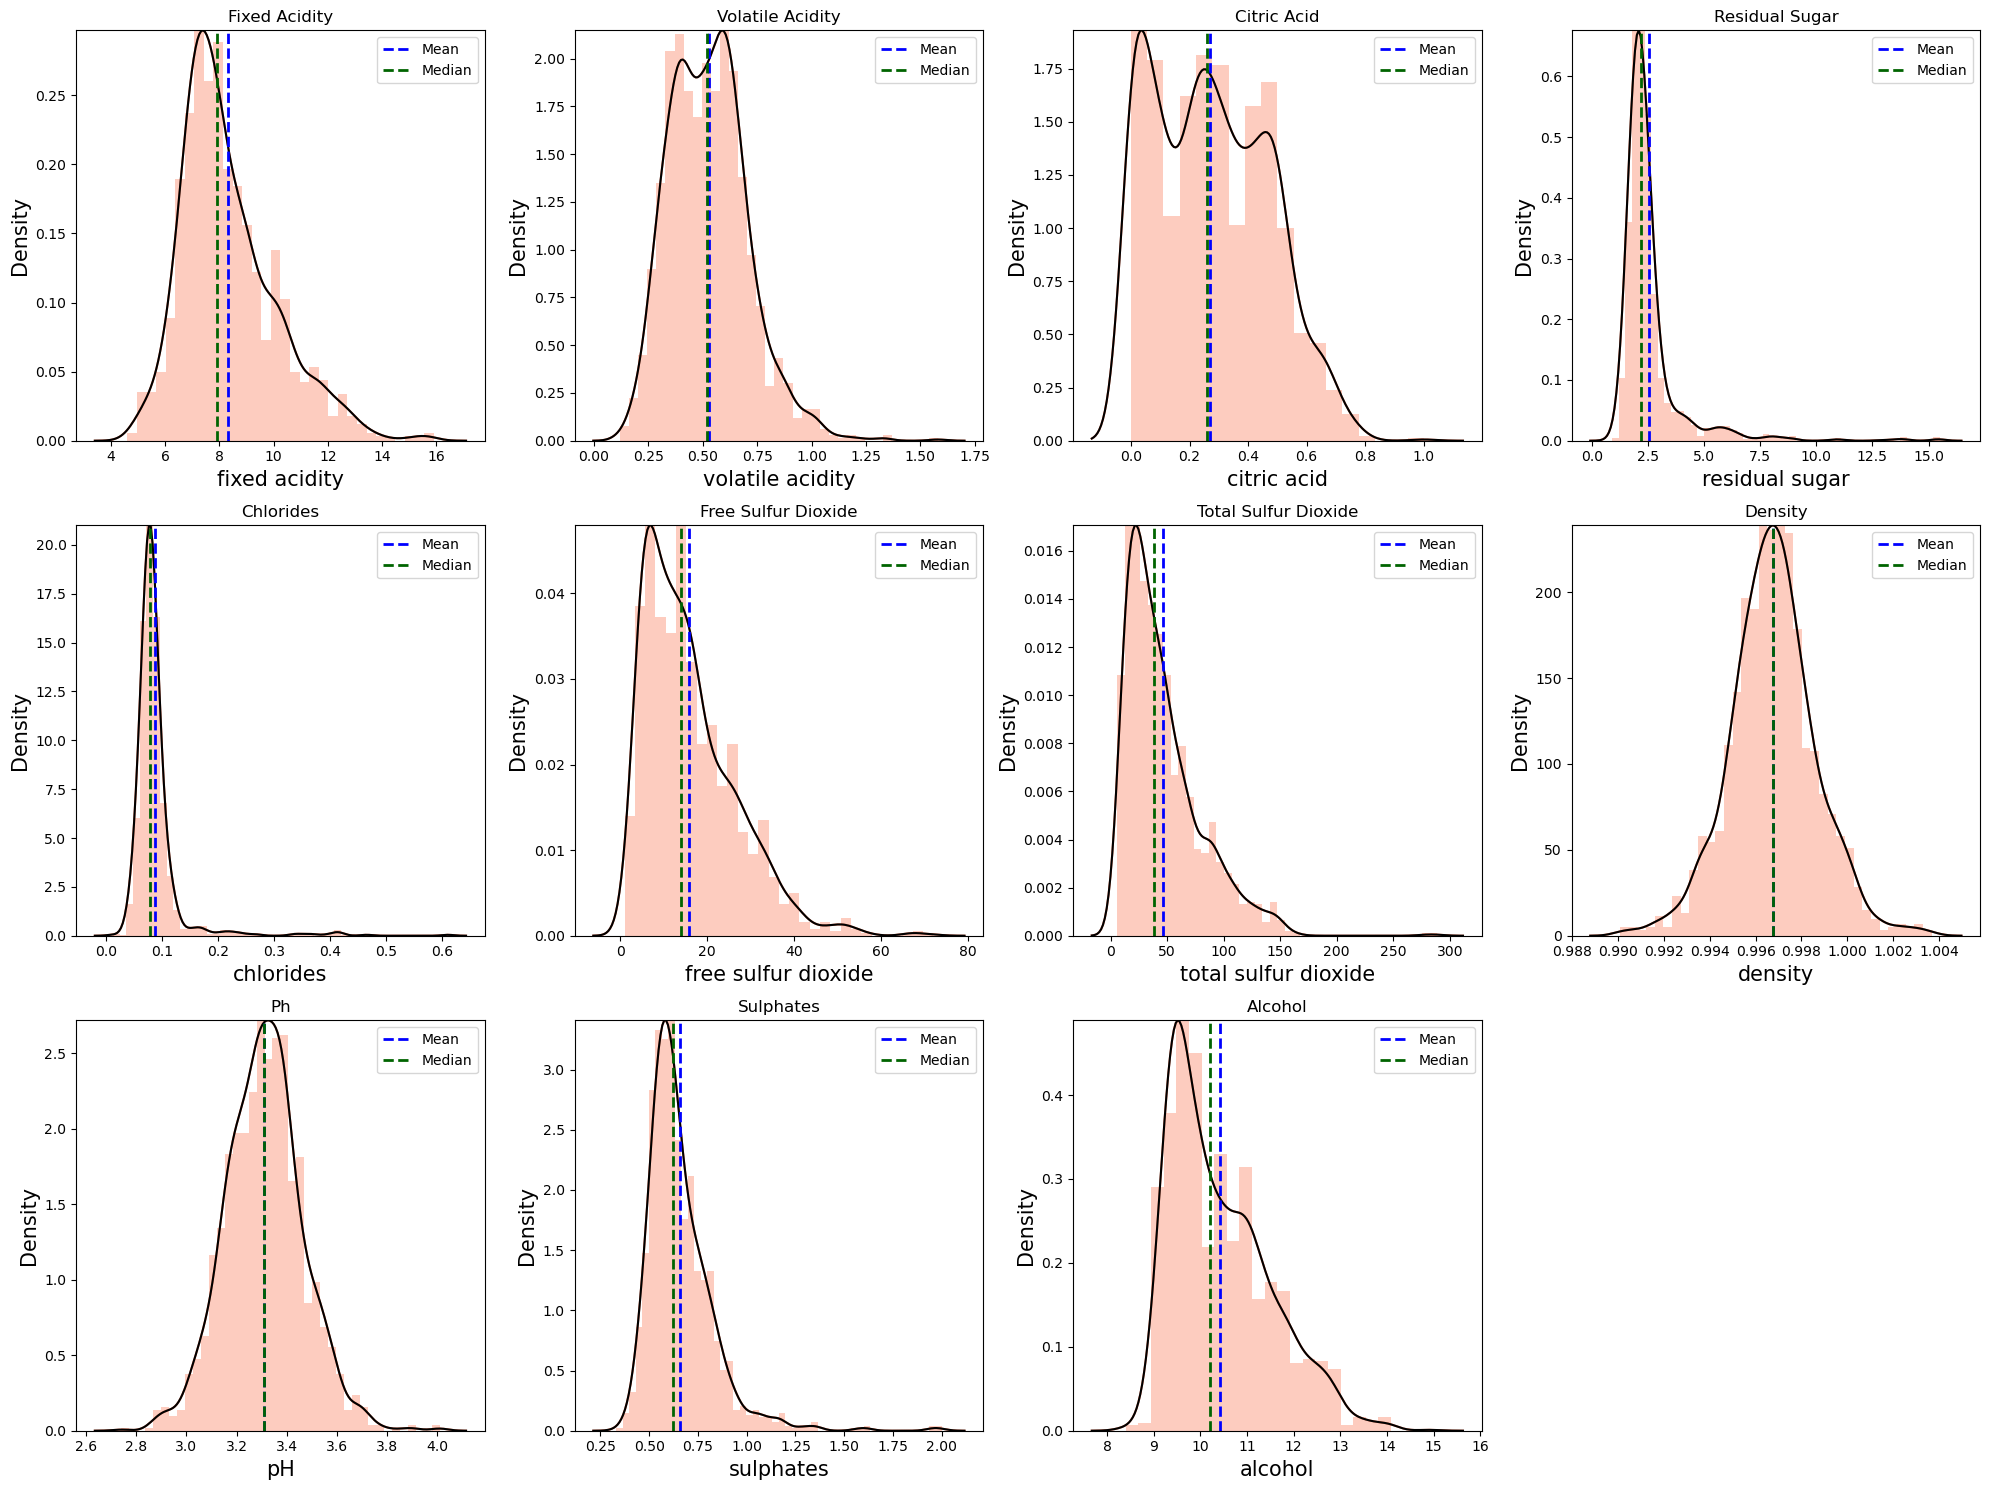

In [14]:
fig = plt.figure(figsize=(20, 15))
for index, column in enumerate(features_df.columns):
    plt.subplot(3, 4, index + 1)
    feature = features_df[column]
    sns.distplot(features_df[column], color=distribution_line_color)
    mean_val = feature.mean()
    median_val = feature.median()
    max_density = sns.kdeplot(feature, color='black').get_lines()[0].get_data()[1].max()
    plt.plot([mean_val, mean_val], [0, max_density], color='blue', linestyle='dashed', linewidth=2, label='Mean')  
    plt.plot([median_val, median_val], [0, max_density], color='darkgreen', linestyle='dashed', linewidth=2, label='Median') 
    plt.ylim(0, max_density)
    plt.title(f'{column.title()}')
    plt.legend()
    plt.tight_layout()
    
plt.show()


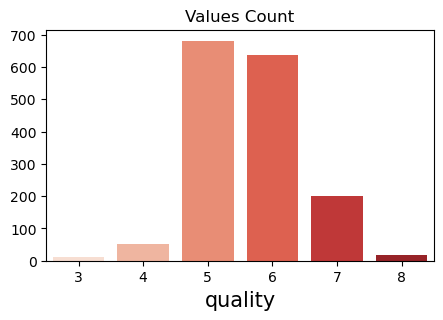

In [15]:
target_count_df = redwine_data_df['quality'].value_counts()
plt.figure(figsize=(5, 3))
sns.barplot(x=target_count_df.index, y=target_count_df.values, palette='Reds')
plt.title("Values Count")
plt.show()

# (a) CLASSIFICATION

## Experiment 1: Original Dataset 

### Data Preparation

#### Label Setup

In [16]:
quality_list = list(set(redwine_data_df['quality'].tolist()))
quality_list

[3, 4, 5, 6, 7, 8]

#### Obtain Features and Target

In [17]:
# Obtain features and target data
features_df = redwine_data_df.drop(columns=['quality'])
target_df = redwine_data_df['quality']

In [18]:
# Transform dataframe into numpy for partitioning
x = features_df.to_numpy()
y = target_df.to_numpy()

In [19]:
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


#### Data Partitioning

    Split samples into 70% training and 30% test data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9811, stratify=y)

In [21]:
unique_class, counts = np.unique(y_test, return_counts=True)

# Create a dictionary to store the counts
count_dict = dict(zip(unique_class, counts))

# Print the counts
for class_number, count in count_dict.items():
    print(f"Class {class_number} count = {count}")

Class 3 count = 3
Class 4 count = 16
Class 5 count = 204
Class 6 count = 192
Class 7 count = 60
Class 8 count = 5


### Default Model

#### Fit Training

In [22]:
default_model = make_pipeline(StandardScaler(), SVC(class_weight='balanced')).fit(x_train, y_train)

#### Testing

In [259]:
def create_confusion_matrix_and_report(model, x, y, labels):
    labels = [str(label) for label in labels]
    
    y_prediction = model.predict(x)
    conf_matrix = confusion_matrix(y, y_prediction)

    conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = labels)
    conf_matrix_display.plot(cmap=color_palette)

    plt.title('Confusion Matrix')
    plt.show()

    report = classification_report(y, y_prediction, target_names=labels)
    print(report)
    
    # Split the classification report by lines
    report_lines = report.strip().split('\n')

    # Corresponding line to 'weighted avg'
    weighted_avg_line = report_lines[-1]

    # Split the 'weighted avg' line by spaces
    weighted_avg_values = weighted_avg_line.split()

    # Extract the first column  from the 'weighted avg' line
    weighted_avg_accuracy = float(weighted_avg_values[2])
    
    return weighted_avg_accuracy

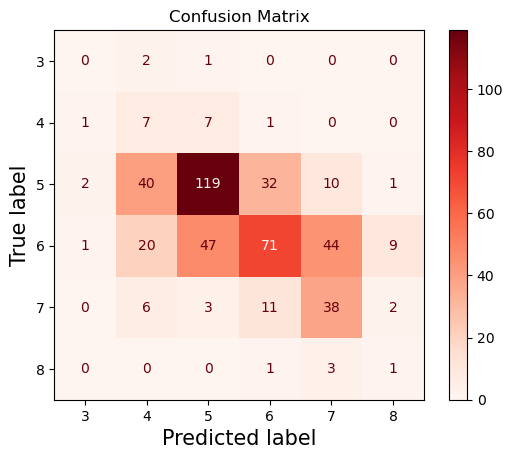

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.09      0.44      0.15        16
           5       0.67      0.58      0.62       204
           6       0.61      0.37      0.46       192
           7       0.40      0.63      0.49        60
           8       0.08      0.20      0.11         5

    accuracy                           0.49       480
   macro avg       0.31      0.37      0.31       480
weighted avg       0.58      0.49      0.52       480



In [260]:
accuracy = create_confusion_matrix_and_report(default_model, x_test, y_test, quality_list)

### Model Optimization

In [89]:
def grid_search_SVC(x, y):
    
    # Create a pipeline with a StandardScaler and SVC with balanced class weights
    default_model = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))

    # Specify the grid: parameters and values
    param_grid = {'svc__C': [0.1, 1, 10, 100],
                  'svc__degree': [1, 2, 3],
                  'svc__gamma': [1, 0.1, 0.01, 0.001, 'auto'],
                  'svc__kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

    # Perform grid search
    grid_search = GridSearchCV(default_model, param_grid, refit=True, verbose=0, n_jobs=-1)
    start = time()
    grid_search.fit(x, y)
    print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time() - start, len(grid_search.cv_results_["params"])))

    # Print best parameters after tuning
    print(grid_search.best_params_)

    # Print how our model looks after hyper-parameter tuning
    print(grid_search.best_estimator_)

    return grid_search.best_estimator_, grid_search.best_params_

#### Grid Search

    Perform a grid search with a wider range of parameters to get a feel on which distribution should random search act on.

In [26]:
grid_search_best_model, best_params = grid_search_SVC(x_train, y_train)

GridSearchCV took 99.49 seconds for 240 candidate parameter settings.
{'svc__C': 10, 'svc__degree': 1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, class_weight='balanced', degree=1, gamma=1))])


In [ ]:
# Get best value of C, degree and gamma (10, 1 and 1)
C = best_params['svc__C']
deg = best_params['svc__degree']
gamma = best_params['svc__gamma']

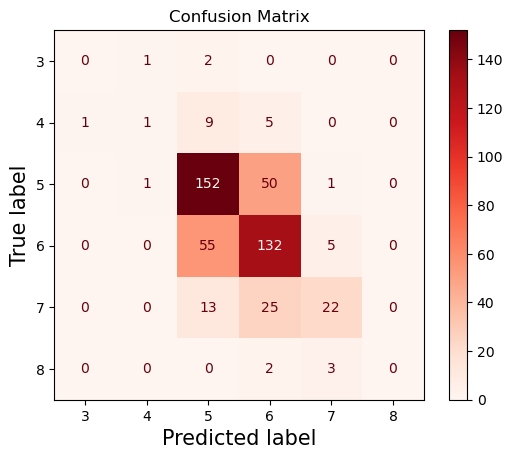

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.06      0.11        16
           5       0.66      0.75      0.70       204
           6       0.62      0.69      0.65       192
           7       0.71      0.37      0.48        60
           8       0.00      0.00      0.00         5

    accuracy                           0.64       480
   macro avg       0.39      0.31      0.32       480
weighted avg       0.63      0.64      0.62       480



In [262]:
grid_accuracy = create_confusion_matrix_and_report(grid_search_best_model, x_test, y_test, quality_list)

In [102]:
def random_search_SVC(classifier, classifier_name, x, y, x_test, y_test, C, deg, gamma, max_iter):
    
    # Parameter Distribution
    if gamma == 'auto':
        param_dist = {
            f'{classifier_name}__estimator__C': stats.expon(scale=C),
            f'{classifier_name}__estimator__gamma': [gamma],
            f'{classifier_name}__estimator__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
            f'{classifier_name}__estimator__degree': [deg],
        }
    else:
        param_dist = {
            f'{classifier_name}__estimator__C': stats.expon(scale=C),
            f'{classifier_name}__estimator__gamma': stats.expon(scale=gamma),
            f'{classifier_name}__estimator__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
            f'{classifier_name}__estimator__degree': [deg],
        }

    # Model Pipeline
    if classifier == OutputCodeClassifier:
        model = make_pipeline(StandardScaler(), classifier(SVC(class_weight='balanced'), code_size=3))
    else:
        model = make_pipeline(StandardScaler(), classifier(SVC(class_weight='balanced')))
    
    # Perform Random Search
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=max_iter, verbose=0, n_jobs=-1)
    start = time()
    random_search.fit(x, y)
    print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
            % ((time() - start), max_iter))
    
    # Best Parameter
    print('Best Parameters n:\n', random_search.best_params_)
    
    # Search Result
    predictions = random_search.best_estimator_.predict(x_test)
    print(classification_report(y_test, predictions))
    
    return random_search.best_estimator_, accuracy_score(y_test, predictions) 

#### OneVsOne SVC Classifier

In [29]:
ovo_model, ovo_accuracy = random_search_SVC(OneVsOneClassifier, 'onevsoneclassifier', 
                            x_train, y_train, x_test, y_test, C, deg, gamma, 10)

RandomizedSearchCV took 776.18 seconds for 10 candidates parameter settings.
Best Parameters n:
 {'onevsoneclassifier__estimator__C': 6.667401505607681, 'onevsoneclassifier__estimator__gamma': 1.3960858172317188, 'onevsoneclassifier__estimator__kernel': 'rbf'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.06      0.12        16
           5       0.66      0.76      0.71       204
           6       0.61      0.68      0.64       192
           7       0.79      0.32      0.45        60
           8       0.00      0.00      0.00         5

    accuracy                           0.64       480
   macro avg       0.51      0.30      0.32       480
weighted avg       0.65      0.64      0.62       480



#### OneVsRest SVC Classifier (not used)

In [ ]:
ovr_model, ovr_accuracy = random_search_SVC(OneVsRestClassifier, 'onevsrestclassifier', x_train, y_train, x_test, y_test, 10)

#### ECOC SVC Classifier (not used)

In [ ]:
ecoc_model, ecoc_accuracy = random_search_SVC(OutputCodeClassifier, 'outputcodeclassifier', x_train, y_train, x_test, y_test, 10)

#### SVC Best Model

##### Print Best Model

In [ ]:
best_accuracy = max(ovo_accuracy, ovr_accuracy) #ecoc_accuracy
if best_accuracy == ovo_accuracy:
    best_model = ovo_model
elif best_accuracy == ovr_accuracy:
    best_model =  ovr_model
# else:
#     best_model =  ecoc_model

In [ ]:
print(best_model)

##### Testing

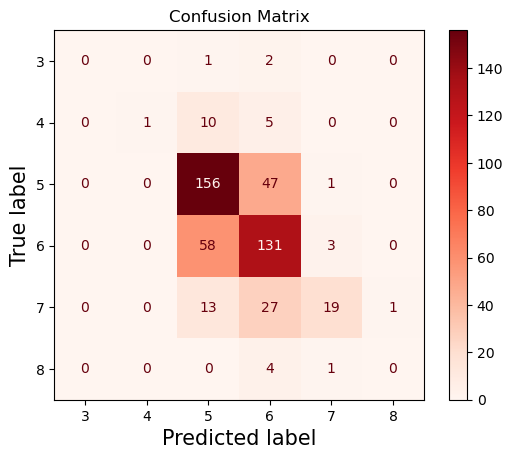

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.06      0.12        16
           5       0.66      0.76      0.71       204
           6       0.61      0.68      0.64       192
           7       0.79      0.32      0.45        60
           8       0.00      0.00      0.00         5

    accuracy                           0.64       480
   macro avg       0.51      0.30      0.32       480
weighted avg       0.65      0.64      0.62       480



In [263]:
random_accuracy = create_confusion_matrix_and_report(ovo_model, x_test, y_test, quality_list)

### Feature Selection

#### Manual Selection based on Most Number of Outliers

In [31]:
test_df = (pd.concat([pd.DataFrame(x_test, columns=features_df.columns), pd.DataFrame(y_test, columns=[target_df.name])], axis=1))

In [32]:
r_redwine_data_df = redwine_data_df.drop(columns=['residual sugar','chlorides'])
r_redwine_test_df = test_df.drop(columns=['residual sugar','chlorides'])

In [33]:
# Obtain features and target data
r_features_df = r_redwine_data_df.drop(columns=['quality'])
r_target_df = r_redwine_data_df['quality']

r_features_test_df = r_redwine_test_df.drop(columns=['quality'])
r_target_test_df = r_redwine_test_df['quality']

In [34]:
# Transform dataframe into numpy for partitioning
r_x = r_features_df.to_numpy()
r_y = r_target_df.to_numpy()

r_x_test = r_features_test_df.to_numpy()
r_y_test = r_target_test_df.to_numpy()

In [35]:
print(r_x.shape)
print(r_y.shape)

(1599, 9)
(1599,)


In [36]:
r_default_model = make_pipeline(StandardScaler(), SVC(class_weight='balanced')).fit(r_x, r_y)

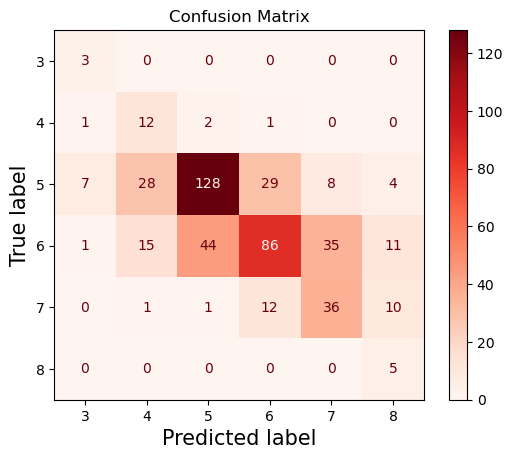

              precision    recall  f1-score   support

           3       0.25      1.00      0.40         3
           4       0.21      0.75      0.33        16
           5       0.73      0.63      0.68       204
           6       0.67      0.45      0.54       192
           7       0.46      0.60      0.52        60
           8       0.17      1.00      0.29         5

    accuracy                           0.56       480
   macro avg       0.41      0.74      0.46       480
weighted avg       0.65      0.56      0.58       480



In [266]:
r_accuracy = create_confusion_matrix_and_report(r_default_model, r_x_test, r_y_test, quality_list)

In [96]:
ms_svc_best_model, ms_best_params = grid_search_SVC(r_x, r_y)

GridSearchCV took 915.86 seconds for 240 candidate parameter settings.
{'svc__C': 0.1, 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, class_weight='balanced', gamma='auto',
                     kernel='poly'))])


In [99]:
# Get best value of C and gamma (0.1, 3 and auto)
ms_C = ms_best_params['svc__C']
ms_deg = ms_best_params['svc__degree']
ms_gamma = ms_best_params['svc__gamma']

In [100]:
ms_svc_best_model, ovo_accuracy = random_search_SVC(OneVsOneClassifier, 'onevsoneclassifier', 
                                    r_x, r_y, r_x_test, r_y_test, ms_C, ms_deg, ms_gamma, 5)

RandomizedSearchCV took 8.39 seconds for 5 candidates parameter settings.
Best Parameters n:
 {'onevsoneclassifier__estimator__C': 0.0410897879728456, 'onevsoneclassifier__estimator__degree': 3, 'onevsoneclassifier__estimator__gamma': 'auto', 'onevsoneclassifier__estimator__kernel': 'poly'}
              precision    recall  f1-score   support

           3       0.25      0.33      0.29         3
           4       0.19      0.31      0.23        16
           5       0.63      0.73      0.67       204
           6       0.56      0.47      0.51       192
           7       0.51      0.38      0.44        60
           8       0.00      0.00      0.00         5

    accuracy                           0.56       480
   macro avg       0.36      0.37      0.36       480
weighted avg       0.56      0.56      0.55       480



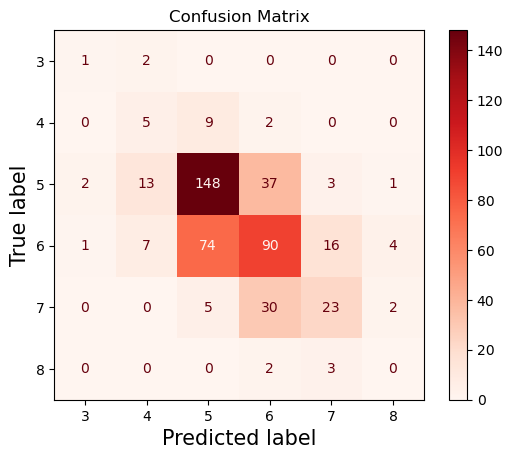

              precision    recall  f1-score   support

           3       0.25      0.33      0.29         3
           4       0.19      0.31      0.23        16
           5       0.63      0.73      0.67       204
           6       0.56      0.47      0.51       192
           7       0.51      0.38      0.44        60
           8       0.00      0.00      0.00         5

    accuracy                           0.56       480
   macro avg       0.36      0.37      0.36       480
weighted avg       0.56      0.56      0.55       480



In [267]:
r_best_accuracy = create_confusion_matrix_and_report(ms_svc_best_model, r_x_test, r_y_test, quality_list)

#### PCA 

In [40]:
def perform_PCA(x_train, x_test, y_train, y_test, target_variance, df):
    
    # Perform PCA to view the CPV plot
    pca_plot = PCA().fit(x_train)
    var = pca_plot.explained_variance_ratio_
    cpv = np.cumsum(var)*100
    plt.plot(np.arange(cpv.size)+1,cpv,'ro-')
    plt.title('PCA: Cumulative % Variance')
    plt.xlabel('No. of Principal Components')
    plt.ylabel('CPV (%)')
#     plt.grid()
    plt.show()
    
    pca = PCA(n_components=target_variance)
    pca.fit(x_train)

    # Get the transformed features
    pca_x_train = pca.transform(x_train)
    pca_x_test = pca.transform(x_test)

    # Get the explained variance ratio and cumulative sum
    var = pca.explained_variance_ratio_
    cpv = np.cumsum(var) * 100
    print(cpv)

    # Find the number of components that explain the target variance
    n_components = len(cpv)

    # Retain the top components that make up the target variance
    pca_x_train = pca_x_train[:, :n_components]
    pca_x_test = pca_x_test[:, :n_components]

    print(f"Retained {n_components} components that explain greater than or equal to {target_variance * 100}% variance.")
    
    # Get the original column names
    original_columns = df.columns

    # Get the principal axes in feature space
    principal_axes = pca.components_

    # Transform the principal components back to the original feature space
    inverse_transformed = pca.inverse_transform(principal_axes.T)

    # Get the names of the original features
    feature_names = df.columns[:-1]  # Exclude the target column

    # For each retained principal component, find the original index of the feature with the highest influence
    for i in range(n_components):
        component = pca.components_[i]
        max_index = np.argmax(np.abs(component))
        feature_name = feature_names[max_index]
        print(f"Component {i+1}: {feature_name}")
        
    return pca_x_train, pca_x_test, y_train, y_test


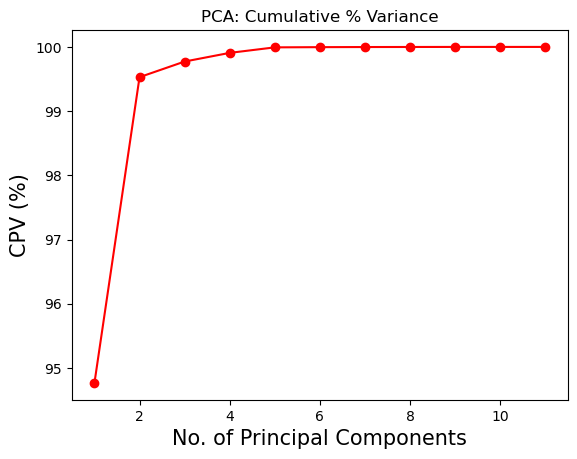

[94.7673135  99.5292548  99.7724627  99.90734466]
Retained 4 components that explain greater than or equal to 99.9% variance.
Component 1: total sulfur dioxide
Component 2: free sulfur dioxide
Component 3: fixed acidity
Component 4: residual sugar


In [41]:
pca_x_train, pca_x_test, pca_y_train, pca_y_test = perform_PCA(x_train, x_test, y_train, y_test, 0.999, redwine_data_df)

In [42]:
pca_default_model = make_pipeline(StandardScaler(), SVC()).fit(pca_x_train, pca_y_train)

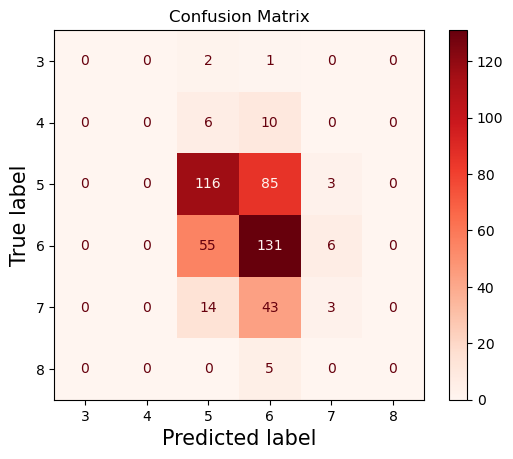

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.60      0.57      0.58       204
           6       0.48      0.68      0.56       192
           7       0.25      0.05      0.08        60
           8       0.00      0.00      0.00         5

    accuracy                           0.52       480
   macro avg       0.22      0.22      0.20       480
weighted avg       0.48      0.52      0.48       480



In [279]:
pca_accuracy = create_confusion_matrix_and_report(pca_default_model, pca_x_test, pca_y_test, quality_list)

In [103]:
pca_svc_best_model, pca_best_params= grid_search_SVC(pca_x_train, pca_y_train)

GridSearchCV took 81.72 seconds for 240 candidate parameter settings.
{'svc__C': 100, 'svc__degree': 1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=100, class_weight='balanced', degree=1, gamma=1))])


In [104]:
# Get best value of C and gamma (100, 1 and 1)
pca_C = pca_best_params['svc__C']
pca_deg = pca_best_params['svc__degree']
pca_gamma = pca_best_params['svc__gamma']

In [105]:
pca_svc_best_model, ovo_accuracy = random_search_SVC(OneVsOneClassifier, 'onevsoneclassifier', 
                                         pca_x_train, pca_y_train, pca_x_test, pca_y_test, pca_C, pca_deg, pca_gamma, 5)

RandomizedSearchCV took 3.21 seconds for 5 candidates parameter settings.
Best Parameters n:
 {'onevsoneclassifier__estimator__C': 36.03379770641978, 'onevsoneclassifier__estimator__degree': 1, 'onevsoneclassifier__estimator__gamma': 5.150694239111168, 'onevsoneclassifier__estimator__kernel': 'linear'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.05      0.44      0.09        16
           5       0.72      0.30      0.43       204
           6       0.50      0.26      0.34       192
           7       0.22      0.13      0.17        60
           8       0.00      0.00      0.00         5

    accuracy                           0.26       480
   macro avg       0.25      0.19      0.17       480
weighted avg       0.54      0.26      0.34       480



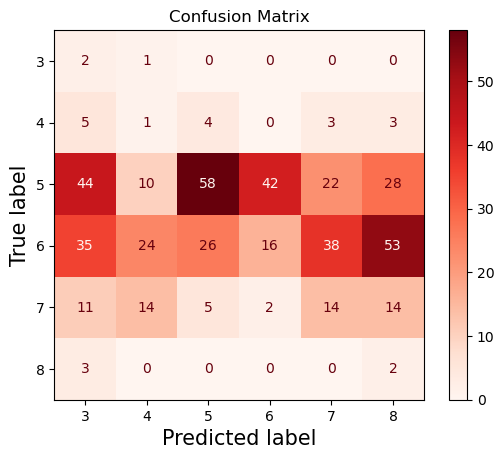

              precision    recall  f1-score   support

           3       0.02      0.67      0.04         3
           4       0.02      0.06      0.03        16
           5       0.62      0.28      0.39       204
           6       0.27      0.08      0.13       192
           7       0.18      0.23      0.20        60
           8       0.02      0.40      0.04         5

    accuracy                           0.19       480
   macro avg       0.19      0.29      0.14       480
weighted avg       0.40      0.19      0.24       480



In [364]:
pca_best_accuracy = create_confusion_matrix_and_report(pca_svc_best_model, pca_x_test, pca_y_test, quality_list)

## Experiment 2: Undersampling + Oversampling

    To deal with the very high imbalance in the dataset, a combination of undersampling and oversampling technique will be used on the training data.
    
    For Undersampling, it will be perfomed by:
    1. Getting all the outliers (identified using the interquantile range) to ensure model's robustness considering that most outliers belong to majority class; and,
    2. Adding a certain percentage from the non-outliers to have enough 'generic' training data for the model.
    
    For Oversampling, the classical SMOTE is used:
    Reference: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

### Data Preparation

#### Undersampling

In [46]:
def get_outliers_data(df, class_column, percentage=0.0):
    outliers_indices = []
    for col in df.columns:
        if col != class_column:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers_indices.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    
    non_outliers = df.drop(outliers_indices)
    if percentage > 0.0:
        non_outliers_sampled = non_outliers.sample(frac=percentage, random_state=9811)
        outliers_df = df.loc[outliers_indices]
        return pd.concat([outliers_df, non_outliers_sampled]), non_outliers.drop(non_outliers_sampled.index)
    else:
        outliers_df = df.loc[outliers_indices]
        return outliers_df, non_outliers

In [47]:
training_df = (pd.concat([pd.DataFrame(x_train, columns=features_df.columns), pd.DataFrame(y_train, columns=[target_df.name])], axis=1))

In [139]:
o_redwine_data_df, no_redwine_data_df = get_outliers_data(training_df, 'quality', 0.40)

#### Obtain Features and Target

In [140]:
# Obtain features and target data
o_features_df = o_redwine_data_df.drop(columns=['quality'])
o_target_df = o_redwine_data_df['quality']

In [141]:
# Transform dataframe into numpy for partitioning
o_x_train = o_features_df.to_numpy()
o_y_train = o_target_df.to_numpy()

In [142]:
# Obtain features and target data
no_features_df = no_redwine_data_df.drop(columns=['quality'])
no_target_df = no_redwine_data_df['quality']

# Transform dataframe into numpy for partitioning
no_x = no_features_df.to_numpy()
no_y = no_target_df.to_numpy()

In [143]:
print(o_x_train.shape)
print(o_y_train.shape)

(737, 11)
(737,)


#### Maintain the original ratio of Train-Test 

In [144]:
print(x_test.shape)
print(y_test.shape)

(480, 11)
(480,)


In [145]:
reduction_ratio = len(o_x_train)*0.3/len(x_test)

In [146]:
sampled_test_df = test_df.sample(frac=reduction_ratio, random_state=9811)

In [147]:
# Obtain features and target data
o_features_test_df = sampled_test_df.drop(columns=['quality'])
o_target_test_df = sampled_test_df['quality']

In [148]:
# Transform dataframe into numpy for partitioning
o_x_test = o_features_test_df.to_numpy()
o_y_test = o_target_test_df.to_numpy()

In [149]:
print(o_x_test.shape)
print(o_y_test.shape)

(221, 11)
(221,)


#### Oversampling

In [150]:
def SMOTE_data(x, y, target_column):
    # Apply SMOTE
    oversample = SMOTE(random_state=9811, sampling_strategy='auto')
    x_balanced, y_balanced = oversample.fit_resample(x, y)

    # Convert the balanced data back to a DataFrame
    balanced_df = pd.concat([pd.DataFrame(x_balanced), pd.Series(y_balanced, name=target_column)], axis=1)

    
    target_count_df = balanced_df[target_column].value_counts()
    plt.figure(figsize=(5, 3))
    sns.barplot(x=target_count_df.index, y=target_count_df.values, palette='Reds')
    plt.title("Values Count")
    plt.show()

    return x_balanced, y_balanced

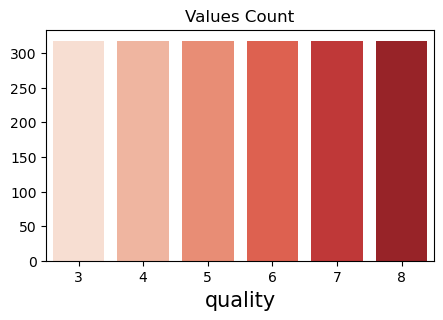

In [151]:
o_x_balanced, o_y_balanced = SMOTE_data(o_x_train, o_y_train, target_column = 'quality')

In [152]:
print(o_x_balanced.shape)
print(o_y_balanced.shape)

(1908, 11)
(1908,)


### Default Model

#### Fit Training

In [153]:
o_default_model = make_pipeline(StandardScaler(), SVC(class_weight='balanced')).fit(o_x_train, o_y_train)

#### Testing

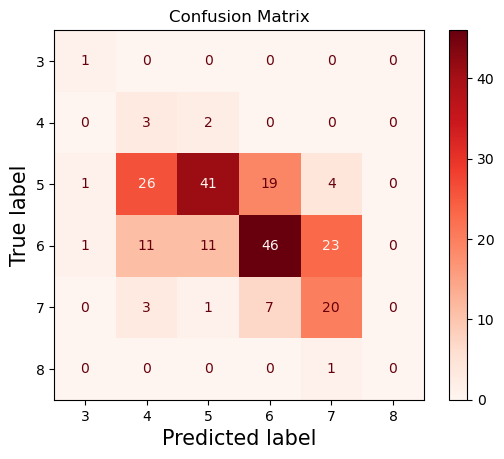

              precision    recall  f1-score   support

           3       0.33      1.00      0.50         1
           4       0.07      0.60      0.12         5
           5       0.75      0.45      0.56        91
           6       0.64      0.50      0.56        92
           7       0.42      0.65      0.51        31
           8       0.00      0.00      0.00         1

    accuracy                           0.50       221
   macro avg       0.37      0.53      0.38       221
weighted avg       0.63      0.50      0.54       221



In [270]:
o_accuracy = create_confusion_matrix_and_report(o_default_model, o_x_test, o_y_test, quality_list)

### Model Optimization

#### Grid Search

In [155]:
o_grid_search_best_model, o_best_params = grid_search_SVC(o_x_balanced, o_y_balanced)

GridSearchCV took 108.01 seconds for 240 candidate parameter settings.
{'svc__C': 10, 'svc__degree': 1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, class_weight='balanced', degree=1, gamma=1))])


In [156]:
# Get best value of C, degree and gamma (100, 1 and 0.1)
o_C = o_best_params['svc__C']
o_deg = o_best_params['svc__degree']
o_gamma = o_best_params['svc__gamma']

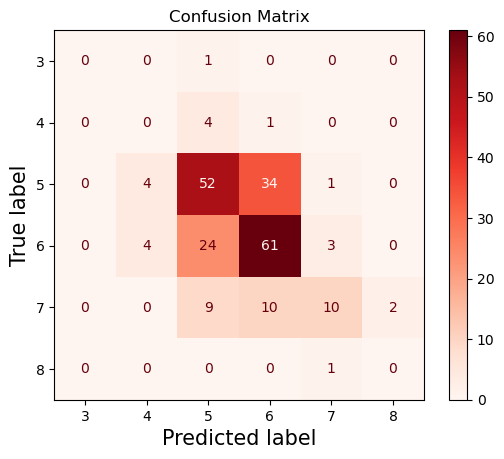

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.58      0.57      0.57        91
           6       0.58      0.66      0.62        92
           7       0.67      0.32      0.43        31
           8       0.00      0.00      0.00         1

    accuracy                           0.56       221
   macro avg       0.30      0.26      0.27       221
weighted avg       0.57      0.56      0.55       221



In [301]:
o_grid_accuracy = create_confusion_matrix_and_report(o_grid_search_best_model, o_x_test, o_y_test, quality_list)

#### OneVsOne SVC Classifier

In [158]:
o_ovo_model, o_ovo_accuracy = random_search_SVC(OneVsOneClassifier, 'onevsoneclassifier', 
                                o_x_balanced, o_y_balanced, o_x_test, o_y_test, o_C, o_deg, o_gamma, 10)

RandomizedSearchCV took 2.95 seconds for 10 candidates parameter settings.
Best Parameters n:
 {'onevsoneclassifier__estimator__C': 2.0568542600294117, 'onevsoneclassifier__estimator__degree': 1, 'onevsoneclassifier__estimator__gamma': 1.2490375217947995, 'onevsoneclassifier__estimator__kernel': 'rbf'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.58      0.57      0.58        91
           6       0.58      0.72      0.64        92
           7       0.77      0.32      0.45        31
           8       0.00      0.00      0.00         1

    accuracy                           0.58       221
   macro avg       0.32      0.27      0.28       221
weighted avg       0.59      0.58      0.57       221



#### OneVsRest SVC Classifier

In [ ]:
o_ovr_model, o_ovr_accuracy = random_search_SVC(OneVsRestClassifier, 'onevsrestclassifier', o_x_balanced, o_y_balanced, o_x_test, o_y_test, 15)

#### SVC Best Model

##### Print Best Model

In [ ]:
o_best_accuracy = max(o_ovo_accuracy, o_ovr_accuracy)
if o_best_accuracy == o_ovo_accuracy:
    o_best_model = o_ovo_model
elif o_best_accuracy == o_ovr_accuracy:
    o_best_model =  o_ovr_model

In [ ]:
print(o_best_model)

##### Testing

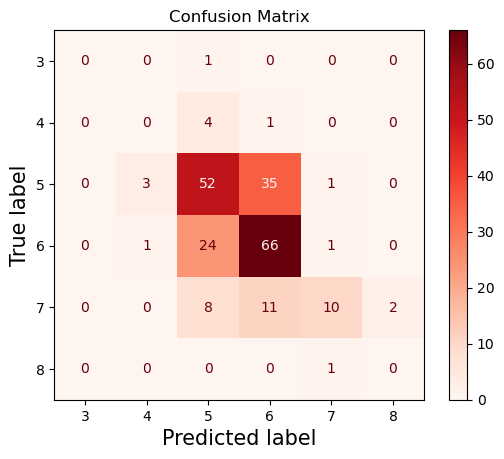

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.58      0.57      0.58        91
           6       0.58      0.72      0.64        92
           7       0.77      0.32      0.45        31
           8       0.00      0.00      0.00         1

    accuracy                           0.58       221
   macro avg       0.32      0.27      0.28       221
weighted avg       0.59      0.58      0.57       221



In [297]:
o_best_accuracy = create_confusion_matrix_and_report(o_ovo_model, o_x_test, o_y_test, quality_list)

### Feature Selection

#### Manual Selection based on Most Number of Outliers

In [ ]:
o_r_redwine_data_df = o_redwine_data_df.drop(columns=['residual sugar','chlorides'])
o_r_redwine_test_df = sampled_test_df.drop(columns=['residual sugar','chlorides'])

In [160]:
# Obtain features and target data
o_r_features_df = r_redwine_data_df.drop(columns=['quality'])
o_r_target_df = r_redwine_data_df['quality']

o_r_features_test_df = r_redwine_test_df.drop(columns=['quality'])
o_r_target_test_df = r_redwine_test_df['quality']

In [161]:
# Transform dataframe into numpy for partitioning
o_r_x = r_features_df.to_numpy()
o_r_y = r_target_df.to_numpy()

o_r_x_test = r_features_test_df.to_numpy()
o_r_y_test = r_target_test_df.to_numpy()

In [162]:
print(o_r_x.shape)
print(o_r_y.shape)

(1599, 9)
(1599,)


In [163]:
o_r_default_model = make_pipeline(StandardScaler(), SVC(class_weight='balanced')).fit(o_r_x, o_r_y)

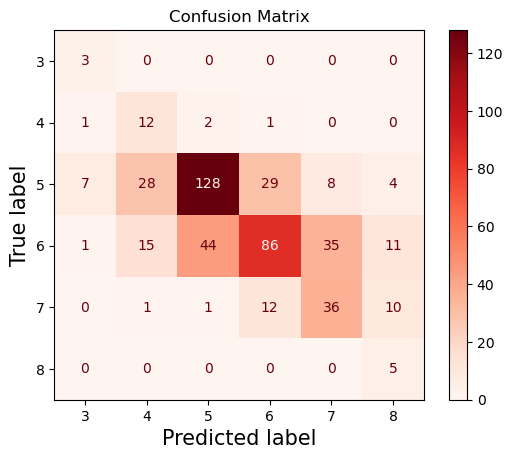

              precision    recall  f1-score   support

           3       0.25      1.00      0.40         3
           4       0.21      0.75      0.33        16
           5       0.73      0.63      0.68       204
           6       0.67      0.45      0.54       192
           7       0.46      0.60      0.52        60
           8       0.17      1.00      0.29         5

    accuracy                           0.56       480
   macro avg       0.41      0.74      0.46       480
weighted avg       0.65      0.56      0.58       480



In [273]:
o_r_accuracy = create_confusion_matrix_and_report(o_r_default_model, o_r_x_test, o_r_y_test, quality_list)

In [74]:
o_ms_best_model, o_ms_best_params = grid_search_SVC(o_r_x, o_r_y)

GridSearchCV took 957.12 seconds for 240 candidate parameter settings.
{'svc__C': 0.1, 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, class_weight='balanced', gamma='auto',
                     kernel='poly'))])


In [165]:
# Get best value of C, degree and gamma (0.1, 3 and auto)
o_ms_C = ms_best_params['svc__C']
o_ms_deg = ms_best_params['svc__degree']
o_ms_gamma = ms_best_params['svc__gamma']

In [166]:
o_ms_best_model, o_ovo_accuracy = random_search_SVC(OneVsOneClassifier, 'onevsoneclassifier', 
                                    o_r_x, o_r_y, o_r_x_test, o_r_y_test, o_ms_C, o_ms_deg, o_ms_gamma, 5)

RandomizedSearchCV took 1.24 seconds for 5 candidates parameter settings.
Best Parameters n:
 {'onevsoneclassifier__estimator__C': 0.16711574399868467, 'onevsoneclassifier__estimator__degree': 3, 'onevsoneclassifier__estimator__gamma': 'auto', 'onevsoneclassifier__estimator__kernel': 'rbf'}
              precision    recall  f1-score   support

           3       0.10      1.00      0.19         3
           4       0.07      0.19      0.11        16
           5       0.69      0.63      0.66       204
           6       0.64      0.36      0.46       192
           7       0.31      0.32      0.31        60
           8       0.07      0.80      0.14         5

    accuracy                           0.47       480
   macro avg       0.31      0.55      0.31       480
weighted avg       0.59      0.47      0.51       480



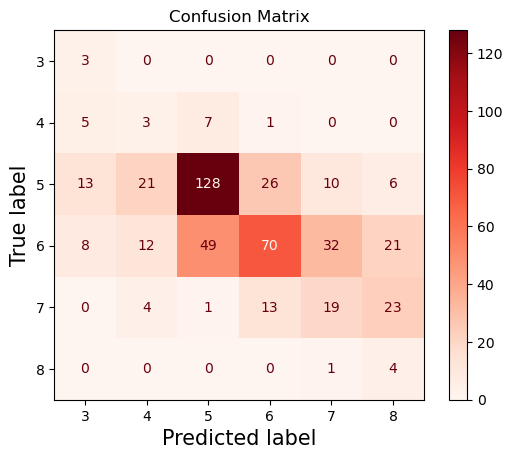

              precision    recall  f1-score   support

           3       0.10      1.00      0.19         3
           4       0.07      0.19      0.11        16
           5       0.69      0.63      0.66       204
           6       0.64      0.36      0.46       192
           7       0.31      0.32      0.31        60
           8       0.07      0.80      0.14         5

    accuracy                           0.47       480
   macro avg       0.31      0.55      0.31       480
weighted avg       0.59      0.47      0.51       480



In [274]:
o_r_best_accuracy = create_confusion_matrix_and_report(o_ms_best_model, o_r_x_test, o_r_y_test, quality_list)

#### PCA

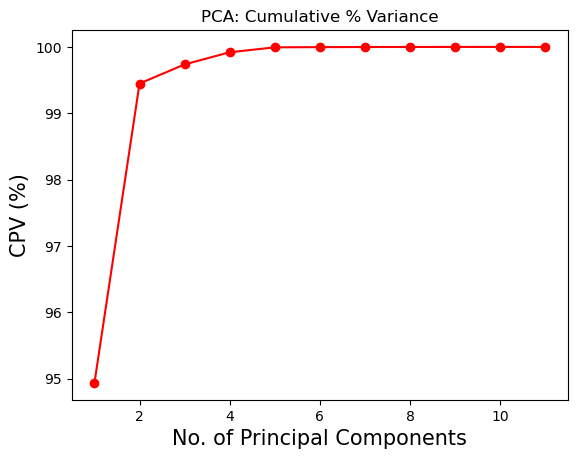

[94.93388749 99.44821513 99.73634162 99.91931865]
Retained 4 components that explain greater than or equal to 99.9% variance.
Component 1: total sulfur dioxide
Component 2: free sulfur dioxide
Component 3: fixed acidity
Component 4: residual sugar


In [76]:
o_pca_x_train, o_pca_x_test, o_pca_y_train, o_pca_y_test = perform_PCA(o_x_train, o_x_test, o_y_train, o_y_test, 0.999, redwine_data_df)

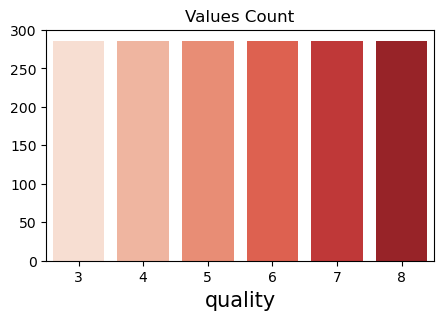

In [77]:
o_pca_x_balanced, o_pca_y_balanced = SMOTE_data(o_pca_x_train, o_pca_y_train, target_column = 'quality')

In [277]:
o_pca_default_model = make_pipeline(StandardScaler(), SVC()).fit(o_pca_x_balanced, o_pca_y_balanced)

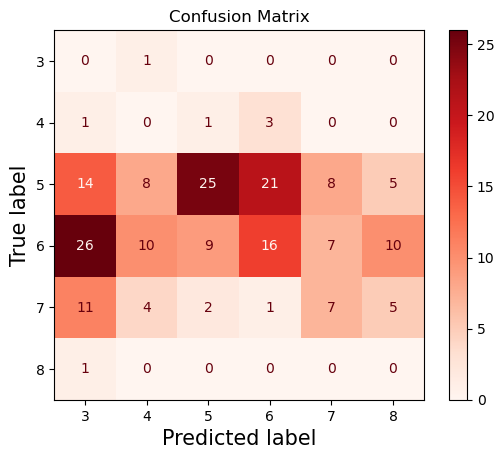

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.68      0.31      0.42        81
           6       0.39      0.21      0.27        78
           7       0.32      0.23      0.27        30
           8       0.00      0.00      0.00         1

    accuracy                           0.24       196
   macro avg       0.23      0.12      0.16       196
weighted avg       0.48      0.24      0.32       196



In [280]:
o_pca_accuracy = create_confusion_matrix_and_report(o_pca_default_model, o_pca_x_test, o_pca_y_test, quality_list)

In [78]:
o_pca_best_model, o_pca_best_params = grid_search_SVC(o_pca_x_balanced, o_pca_y_balanced)

GridSearchCV took 115.53 seconds for 240 candidate parameter settings.
{'svc__C': 100, 'svc__degree': 1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=100, class_weight='balanced', degree=1, gamma=1))])


In [168]:
# Get best value of C, degree and gamma (100, 1 and 1)
o_pca_C = pca_best_params['svc__C']
o_pca_deg = pca_best_params['svc__degree']
o_pca_gamma = pca_best_params['svc__gamma']

In [169]:
pca_svc_best_model, ovo_accuracy = random_search_SVC(OneVsOneClassifier, 'onevsoneclassifier', 
                                         o_pca_x_balanced, o_pca_y_balanced, o_pca_x_test, o_pca_y_test, 
                                         o_pca_C, o_pca_deg, o_pca_gamma, 5)

RandomizedSearchCV took 8.12 seconds for 5 candidates parameter settings.
Best Parameters n:
 {'onevsoneclassifier__estimator__C': 228.1434281776169, 'onevsoneclassifier__estimator__degree': 1, 'onevsoneclassifier__estimator__gamma': 0.18370565356504226, 'onevsoneclassifier__estimator__kernel': 'linear'}
              precision    recall  f1-score   support

           3       0.01      1.00      0.03         1
           4       0.00      0.00      0.00         5
           5       0.73      0.27      0.40        81
           6       0.30      0.09      0.14        78
           7       0.11      0.07      0.08        30
           8       0.00      0.00      0.00         1

    accuracy                           0.16       196
   macro avg       0.19      0.24      0.11       196
weighted avg       0.44      0.16      0.23       196



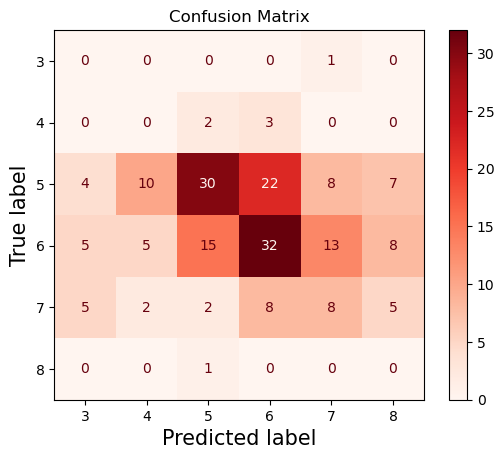

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.60      0.37      0.46        81
           6       0.49      0.41      0.45        78
           7       0.27      0.27      0.27        30
           8       0.00      0.00      0.00         1

    accuracy                           0.36       196
   macro avg       0.23      0.17      0.20       196
weighted avg       0.48      0.36      0.41       196



In [278]:
o_pca_best_accuracy = create_confusion_matrix_and_report(o_pca_best_model, o_pca_x_test, o_pca_y_test, quality_list)

# (b) REGRESSION

## Experiment 1: Original Dataset

### Default Model


In [80]:
default_svr_model = make_pipeline(StandardScaler(), SVR()).fit(x_train, y_train)

In [325]:
def plot_pred_vs_actual(x_train, y_train, x_test, y_test, model, title):
    
    y_test_pred = model.predict(x_test)
    max_val = np.max([np.max(y_test), np.max(y_test_pred)])
    
    plt.plot(np.array([0, max_val]),np.array([0, max_val]),color='r',label='_nolegend_')
    plt.scatter(y_test, y_test_pred, alpha=0.75, label="Testing")
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Plot of Testing with {title}')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_test_pred)
    print(f"MSE on Test Set: {mse}")
    
    print('R-squared on Test Data: %.5f' % model.score(x_test,y_test))
    
    # Calculate MAD
    mean_value = np.mean(y_test_pred)
    abs_deviations = np.abs(y_test_pred - mean_value)
    mad = np.mean(abs_deviations)
    print(f"Mean Absolute Deviation (MAD) on Test Set: {mad}")
    
    return mse, model.score(x_test,y_test), mad

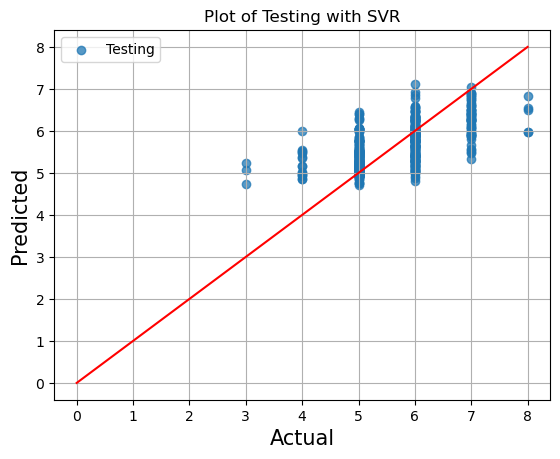

MSE on Test Set: 0.3879688498730811
R-squared on Test Data: 0.40159
Mean Absolute Deviation (MAD) on Test Set: 0.44006211525978506


In [326]:
mse, r2, mad = plot_pred_vs_actual(x_train, y_train, x_test, y_test, default_svr_model, 'SVR')

In [282]:
def regression_accuracy(model, x, y, tolerance, labels):
    # Predict y values
    y_pred = model.predict(x)
    
    # Round predictions based on tolerance
    y_tol = np.where(np.abs(y_pred - y) <= tolerance, y, np.round(y_pred))
    
    # Create confusion matrix
    conf_matrix = confusion_matrix(y, y_tol)
    
    labels_str = [str(label) for label in labels]
    
    conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = labels_str)
    conf_matrix_display.plot(cmap=color_palette)

    plt.title('Confusion Matrix')
    plt.show()

    report = classification_report(y, y_tol, target_names=labels_str)
    print(report)
    
    # Split the classification report by lines
    report_lines = report.strip().split('\n')

    # Corresponding line to 'weighted avg'
    weighted_avg_line = report_lines[-1]

    # Split the 'weighted avg' line by spaces
    weighted_avg_values = weighted_avg_line.split()

    # Extract the first column  from the 'weighted avg' line
    weighted_avg_accuracy = float(weighted_avg_values[2])
    
    return weighted_avg_accuracy

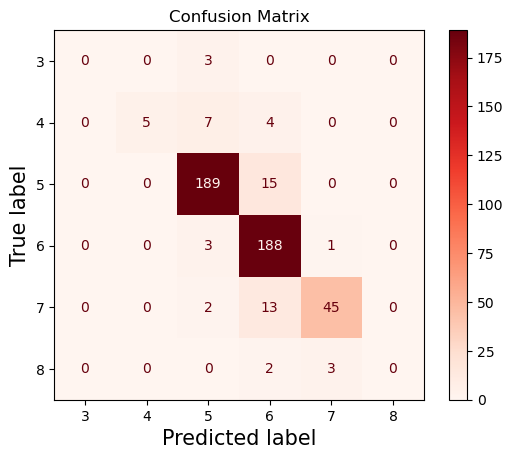

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.31      0.48        16
           5       0.93      0.93      0.93       204
           6       0.85      0.98      0.91       192
           7       0.92      0.75      0.83        60
           8       0.00      0.00      0.00         5

    accuracy                           0.89       480
   macro avg       0.62      0.49      0.52       480
weighted avg       0.88      0.89      0.88       480



In [283]:
reg_accuracy = regression_accuracy(default_svr_model, x_test, y_test, 1, quality_list)

### Model Optimization

#### Grid Search

In [171]:
def grid_search_SVR(x, y):
    
    # Create a pipeline with a StandardScaler and SVC with balanced class weights
    default_model = make_pipeline(StandardScaler(), SVR())

    # Specify the grid: parameters and values
    param_grid = {'svr__epsilon': [0.1, 1, 10],
                  'svr__gamma': [1, 0.1, 0.01, 'auto'], #0.001
                  'svr__kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

    # Perform grid search
    grid_search = GridSearchCV(default_model, param_grid, refit=True, verbose=0, n_jobs=-1 )
    start = time()
    grid_search.fit(x, y)
    print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time() - start, len(grid_search.cv_results_["params"])))

    # Print best parameters after tuning
    print(grid_search.best_params_)

    # Print how our model looks after hyper-parameter tuning
    print(grid_search.best_estimator_)

    return grid_search.best_estimator_, grid_search.best_params_

In [172]:
svr_grid_search_model, svr_best_params = grid_search_SVR(x_train, y_train)

GridSearchCV took 196.25 seconds for 48 candidate parameter settings.
{'svr__epsilon': 0.1, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(gamma='auto'))])


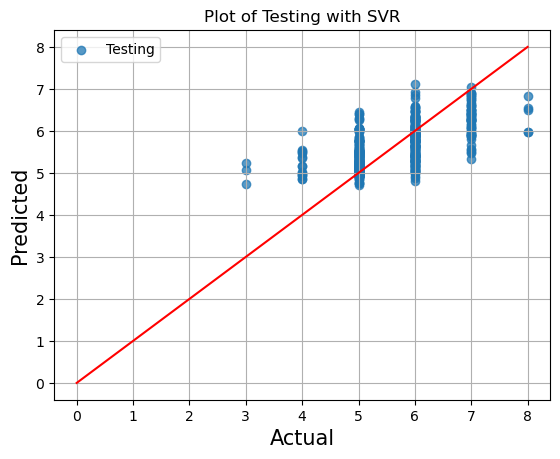

MSE on Test Set: 0.38796884987308106
R-squared on Test Data: 0.40159
Mean Absolute Deviation (MAD) on Test Set: 0.4400621152597851


In [327]:
grid_mse, grid_r2, grid_mad = plot_pred_vs_actual(x_train, y_train, x_test, y_test, svr_grid_search_model, 'SVR')

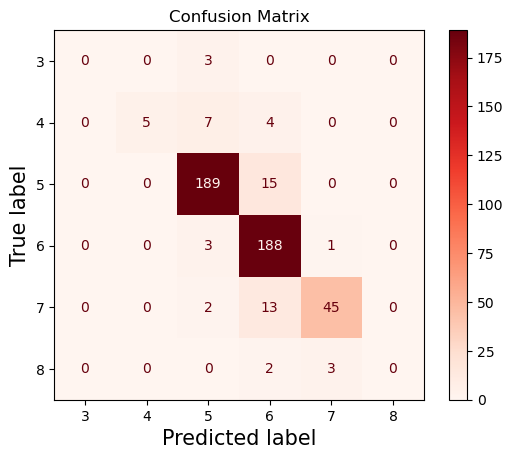

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.31      0.48        16
           5       0.93      0.93      0.93       204
           6       0.85      0.98      0.91       192
           7       0.92      0.75      0.83        60
           8       0.00      0.00      0.00         5

    accuracy                           0.89       480
   macro avg       0.62      0.49      0.52       480
weighted avg       0.88      0.89      0.88       480



In [361]:
reg_grid_accuracy = regression_accuracy(svr_grid_search_model, x_test, y_test, 1, quality_list)

In [173]:
# Get best value of C, degree and gamma (x, x, and x)
svr_ep = svr_best_params['svr__epsilon']
svr_gamma = svr_best_params['svr__gamma']

#### Random Search

In [180]:
def random_search_SVR(classifier, classifier_name, max_iter, x, y, x_test, y_test, epsilon, gamma):
    # Parameter Distribution
    if gamma == 'auto':
            param_dist = {
                f'{classifier_name}__epsilon': stats.expon(scale=epsilon),
                f'{classifier_name}__gamma': [gamma],
                f'{classifier_name}__kernel': ['linear']
            }
    else:
        param_dist = {
            f'{classifier_name}__epsilon': stats.expon(scale=epsilon),
            f'{classifier_name}__gamma': stats.expon(scale=gamma),
            f'{classifier_name}__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
        }

    # Model Pipeline
    model = make_pipeline(StandardScaler(), classifier())

    # Perform Random Search
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=max_iter, verbose=0, n_jobs=-1)
    start = time()
    
    random_search.fit(x, y)
    print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
            % ((time() - start), max_iter))
    
    # Best Parameter
    print('Best Parameters:\n', random_search.best_params_)

    return random_search.best_estimator_

In [85]:
best_svr_model = random_search_SVR(SVR, 'svr', 5, x_train, y_train, x_test, y_test, svr_ep, svr_gamma)

RandomizedSearchCV took 2197.90 seconds for 10 candidates parameter settings.
Best Parameters:
 {'svr__epsilon': 0.3590761364773279, 'svr__gamma': 1.3488225219102035, 'svr__kernel': 'linear'}


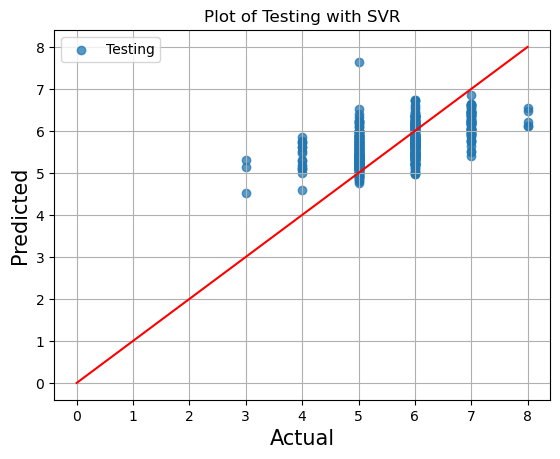

MSE on Test Set: 0.4430675327454148
R-squared on Test Data: 0.31660
Mean Absolute Deviation (MAD) on Test Set: 0.3779782497435798


In [328]:
random_mse, random_r2, random_mad = plot_pred_vs_actual(x_train, y_train, x_test, y_test, best_svr_model, 'SVR')

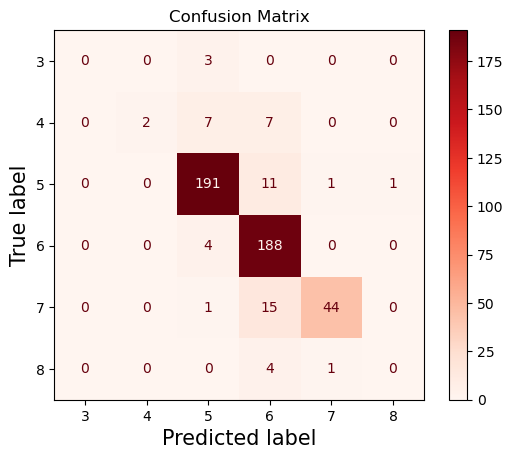

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.12      0.22        16
           5       0.93      0.94      0.93       204
           6       0.84      0.98      0.90       192
           7       0.96      0.73      0.83        60
           8       0.00      0.00      0.00         5

    accuracy                           0.89       480
   macro avg       0.62      0.46      0.48       480
weighted avg       0.88      0.89      0.87       480



In [362]:
reg_best_accuracy = regression_accuracy(best_svr_model, x_test, y_test, 1, quality_list)

### Feature Selection

#### Manual Selection Based on Most Number of Outliers

In [286]:
r_default_svr_model = make_pipeline(StandardScaler(), SVR()).fit(r_x, r_y)

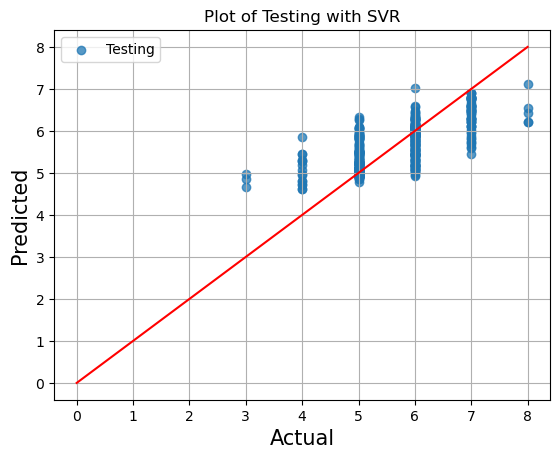

MSE on Test Set: 0.30736697300726484
R-squared on Test Data: 0.52591
Mean Absolute Deviation (MAD) on Test Set: 0.46284285505273626


In [329]:
r_mse, r_r2, r_mad = plot_pred_vs_actual(r_x, r_y, r_x_test, r_y_test, r_default_svr_model, 'SVR')

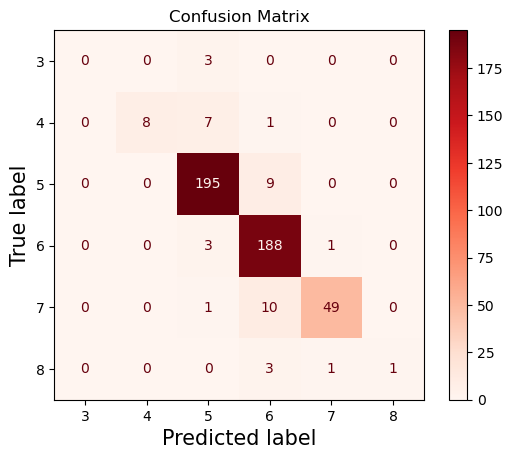

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.50      0.67        16
           5       0.93      0.96      0.94       204
           6       0.89      0.98      0.93       192
           7       0.96      0.82      0.88        60
           8       1.00      0.20      0.33         5

    accuracy                           0.92       480
   macro avg       0.80      0.58      0.63       480
weighted avg       0.92      0.92      0.91       480



In [289]:
reg_r_accuracy = regression_accuracy(r_default_svr_model, r_x_test, r_y_test, 1, quality_list)

In [175]:
r_svr_grid_search_model, r_svr_best_params = grid_search_SVR(r_x, r_y)

GridSearchCV took 208.20 seconds for 48 candidate parameter settings.
{'svr__epsilon': 0.1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(gamma=0.01))])


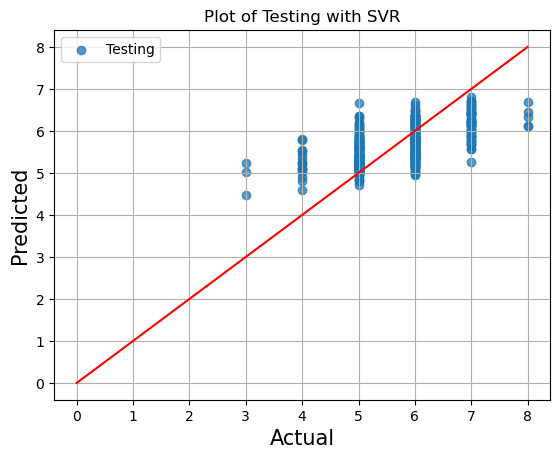

MSE on Test Set: 0.4032068854382019
R-squared on Test Data: 0.37808
Mean Absolute Deviation (MAD) on Test Set: 0.3775948599361508


In [330]:
r_grid_mse, r_grid_r2, r_grid_mad = plot_pred_vs_actual(r_x, r_y, r_x_test, r_y_test, r_best_svr_model, 'SVR')

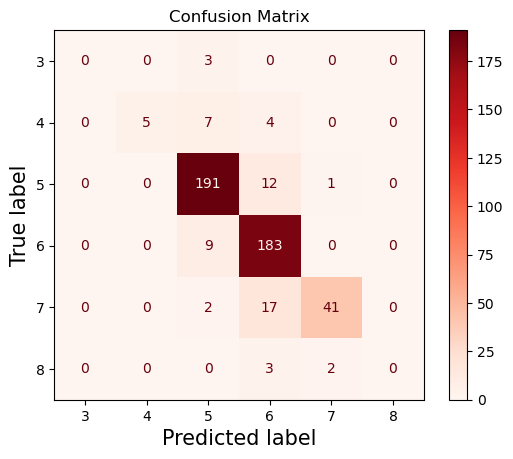

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.31      0.48        16
           5       0.90      0.94      0.92       204
           6       0.84      0.95      0.89       192
           7       0.93      0.68      0.79        60
           8       0.00      0.00      0.00         5

    accuracy                           0.88       480
   macro avg       0.61      0.48      0.51       480
weighted avg       0.87      0.88      0.86       480



In [363]:
reg_r_grid_accuracy = regression_accuracy(r_svr_grid_search_model, r_x_test, r_y_test, 1, quality_list)

In [176]:
# Get best value of C, degree and gamma (0.3 and 1)
r_svr_ep = r_svr_best_params['svr__epsilon']
r_svr_gamma = r_svr_best_params['svr__gamma']

In [181]:
r_best_svr_model = random_search_SVR(SVR, 'svr', 5, r_x, r_y, r_x_test, r_y_test, r_svr_ep, r_svr_gamma)

RandomizedSearchCV took 3.62 seconds for 5 candidates parameter settings.
Best Parameters:
 {'svr__epsilon': 0.2830944139837036, 'svr__gamma': 0.011012605403740813, 'svr__kernel': 'rbf'}


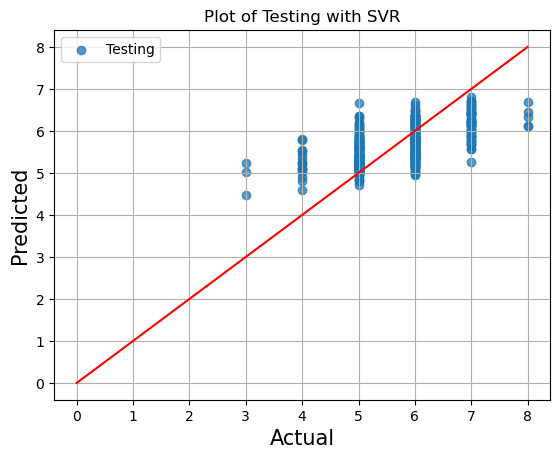

MSE on Test Set: 0.4032068854382019
R-squared on Test Data: 0.37808
Mean Absolute Deviation (MAD) on Test Set: 0.3775948599361508


In [332]:
r_random_mse, r_random_r2, r_random_mad = plot_pred_vs_actual(r_x, r_y, r_x_test, r_y_test, r_best_svr_model, 'SVR')

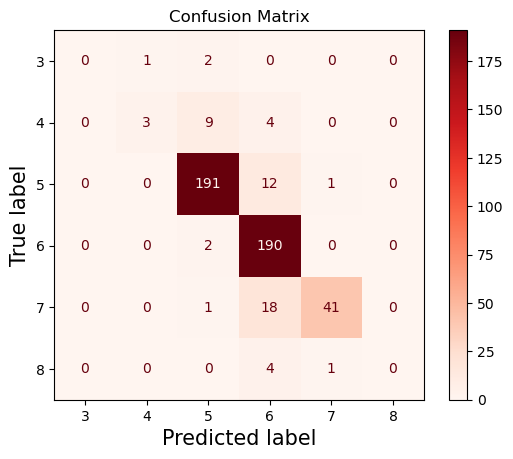

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.75      0.19      0.30        16
           5       0.93      0.94      0.93       204
           6       0.83      0.99      0.90       192
           7       0.95      0.68      0.80        60
           8       0.00      0.00      0.00         5

    accuracy                           0.89       480
   macro avg       0.58      0.47      0.49       480
weighted avg       0.87      0.89      0.87       480



In [288]:
reg_r_best_accuracy = regression_accuracy(r_best_svr_model, r_x_test, r_y_test, 1, quality_list)

#### PCA

In [290]:
pca_default_svr_model = make_pipeline(StandardScaler(), SVR()).fit(pca_x_train, pca_y_train)

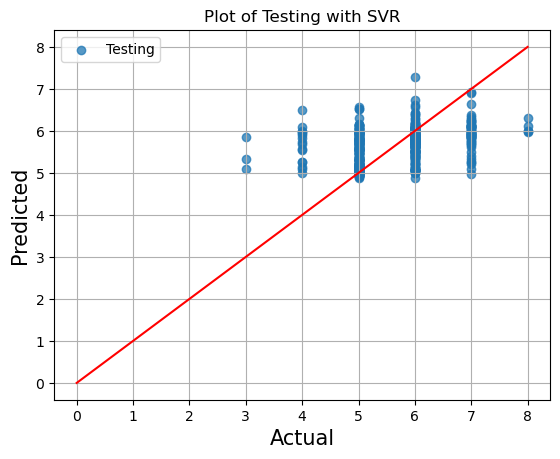

MSE on Test Set: 0.5719543795852091
R-squared on Test Data: 0.11780
Mean Absolute Deviation (MAD) on Test Set: 0.34192434589029724


In [334]:
pca_mse, pca_r2, pca_mad = plot_pred_vs_actual(pca_x_train, pca_y_train, pca_x_test, 
                                                                        pca_y_test, pca_default_svr_model, 'SVR')

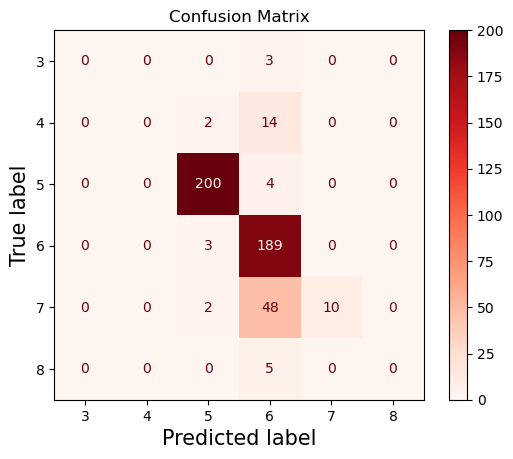

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.97      0.98      0.97       204
           6       0.72      0.98      0.83       192
           7       1.00      0.17      0.29        60
           8       0.00      0.00      0.00         5

    accuracy                           0.83       480
   macro avg       0.45      0.36      0.35       480
weighted avg       0.82      0.83      0.78       480



In [292]:
pca_reg_accuracy = regression_accuracy(pca_svr_best_model, pca_x_test, pca_y_test, 1, quality_list)

In [183]:
pca_svr_grid_search_model, pca_svr_best_params = grid_search_SVR(pca_x_train, pca_y_train)

GridSearchCV took 11.13 seconds for 48 candidate parameter settings.
{'svr__epsilon': 0.1, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(gamma=0.1))])


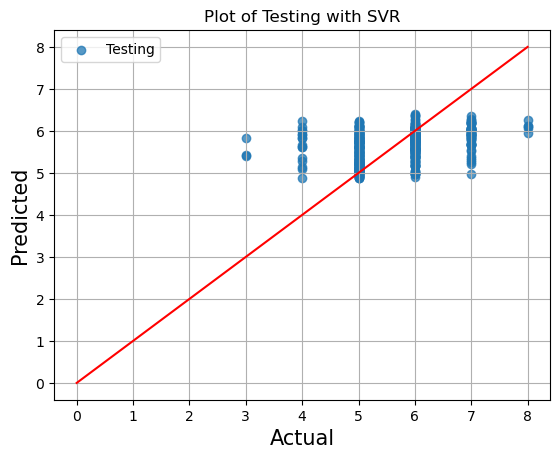

MSE on Test Set: 0.5637806985020752
R-squared on Test Data: 0.13041
Mean Absolute Deviation (MAD) on Test Set: 0.3078876310704838


In [335]:
pca_grid_mse, pca_grid_r2, pca_grid_mad = plot_pred_vs_actual(pca_x_train, pca_y_train, pca_x_test, pca_y_test, 
                                                    pca_svr_grid_search_model, 'SVR')

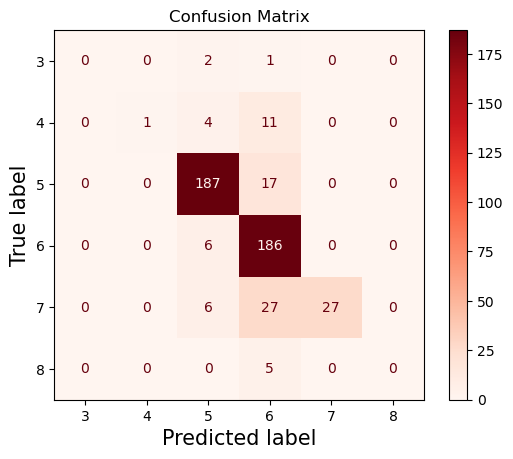

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.06      0.12        16
           5       0.91      0.92      0.91       204
           6       0.75      0.97      0.85       192
           7       1.00      0.45      0.62        60
           8       0.00      0.00      0.00         5

    accuracy                           0.84       480
   macro avg       0.61      0.40      0.42       480
weighted avg       0.85      0.84      0.81       480



In [365]:
pca_reg_grid_accuracy = regression_accuracy(pca_svr_grid_search_model, pca_x_test, pca_y_test, 1, quality_list)

In [184]:
# Get best value of C, degree and gamma (x, x, and x)
pca_svr_ep = pca_svr_best_params['svr__epsilon']
pca_svr_gamma = pca_svr_best_params['svr__gamma']

In [185]:
pca_svr_best_model = random_search_SVR(SVR, 'svr', 5,pca_x_train, pca_y_train, pca_x_test, pca_y_test, 
                                           pca_svr_ep, pca_svr_gamma)

RandomizedSearchCV took 0.34 seconds for 5 candidates parameter settings.
Best Parameters:
 {'svr__epsilon': 0.11767830033815714, 'svr__gamma': 0.43515349833152595, 'svr__kernel': 'linear'}


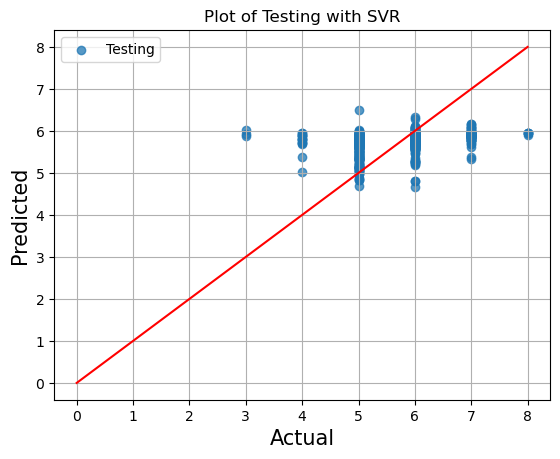

MSE on Test Set: 0.6001345833295375
R-squared on Test Data: 0.07434
Mean Absolute Deviation (MAD) on Test Set: 0.19811973025053475


In [336]:
pca_random_mse, pca_random_r2, pca_random_mad = plot_pred_vs_actual(pca_x_train, pca_y_train, pca_x_test, pca_y_test, 
                                                              pca_svr_best_model, 'SVR')

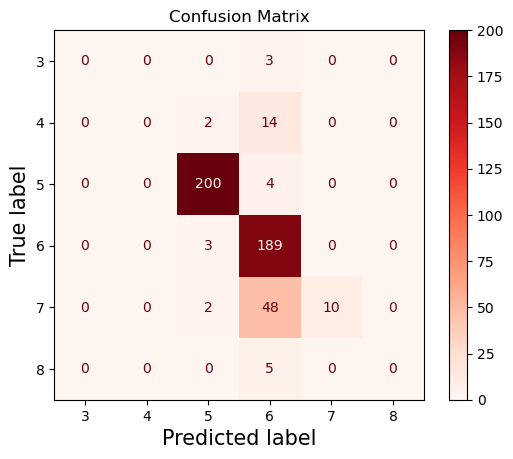

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.97      0.98      0.97       204
           6       0.72      0.98      0.83       192
           7       1.00      0.17      0.29        60
           8       0.00      0.00      0.00         5

    accuracy                           0.83       480
   macro avg       0.45      0.36      0.35       480
weighted avg       0.82      0.83      0.78       480



In [367]:
reg_pca_best_accuracy = regression_accuracy(pca_svr_best_model, pca_x_test, pca_y_test, 1, quality_list)

## Experiment 2: Undersampling + Oversampling

### Default Model

In [187]:
o_default_svr_model = make_pipeline(StandardScaler(), SVR()).fit(o_x_train, o_y_train)

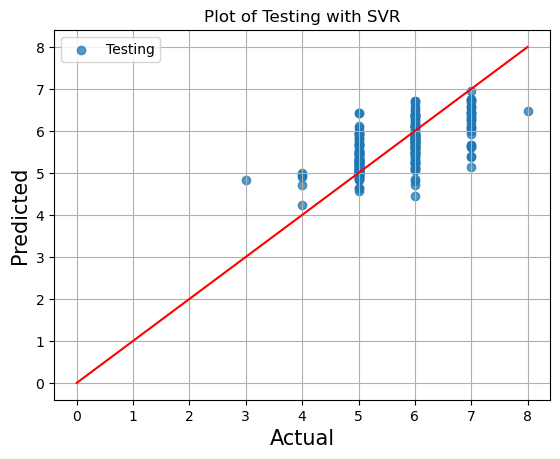

MSE on Test Set: 0.36348979441873613
R-squared on Test Data: 0.39230
Mean Absolute Deviation (MAD) on Test Set: 0.4506525971162839


In [337]:
o_mse, o_r2, o_mad = plot_pred_vs_actual(o_x_train, o_y_train, o_x_test, o_y_test, o_default_svr_model, 'SVR')

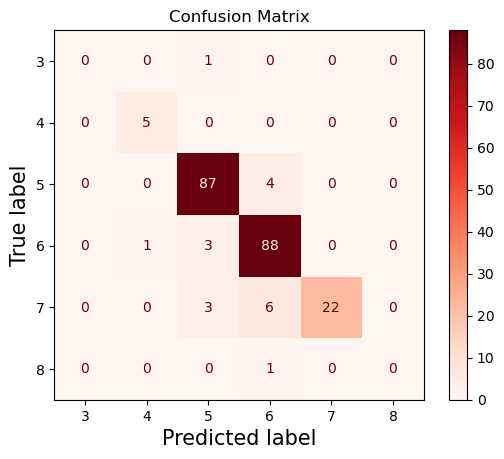

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       0.93      0.96      0.94        91
           6       0.89      0.96      0.92        92
           7       1.00      0.71      0.83        31
           8       0.00      0.00      0.00         1

    accuracy                           0.91       221
   macro avg       0.61      0.60      0.60       221
weighted avg       0.91      0.91      0.91       221



In [294]:
o_reg_accuracy = regression_accuracy(o_default_svr_model, o_x_test, o_y_test, 1, quality_list)

### Model Optimization

#### Grid Search

In [200]:
o_svr_grid_search_model, o_svr_best_params = grid_search_SVR(o_x_train, o_y_train)

GridSearchCV took 30.69 seconds for 48 candidate parameter settings.
{'svr__epsilon': 0.1, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(gamma=0.1))])


In [201]:
# Get best value of C, degree and gamma (x, x, and x)
o_svr_ep = o_svr_best_params['svr__epsilon']
o_svr_gamma = o_svr_best_params['svr__gamma']

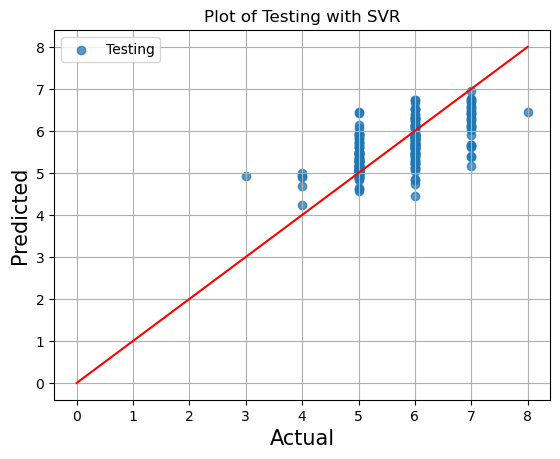

MSE on Test Set: 0.36257240347012715
R-squared on Test Data: 0.39384
Mean Absolute Deviation (MAD) on Test Set: 0.4494175553990567


In [338]:
o_grid_mse, o_grid_r2, o_grid_mad = plot_pred_vs_actual(o_x_train, o_y_train, o_x_test, o_y_test, 
                                                        o_svr_grid_search_model, 'SVR')

#### Random Search

In [202]:
o_best_svr_model = random_search_SVR(SVR, 'svr', 20, o_x_train, o_y_train, o_x_test, o_y_test, o_svr_ep, o_svr_gamma)

RandomizedSearchCV took 0.56 seconds for 20 candidates parameter settings.
Best Parameters:
 {'svr__epsilon': 0.08777950876423701, 'svr__gamma': 0.14164803225057626, 'svr__kernel': 'rbf'}


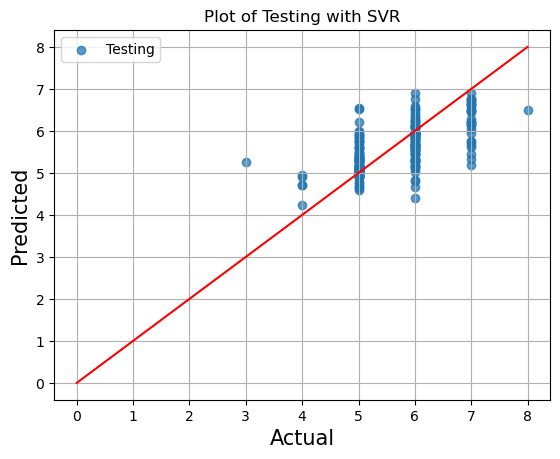

MSE on Test Set: 0.36433287466396075
R-squared on Test Data: 0.39090
Mean Absolute Deviation (MAD) on Test Set: 0.45879079784143695


In [339]:
o_random_mse, o_random_r2, o_random_mad = plot_pred_vs_actual(o_x_train, o_y_train, o_x_test, o_y_test, o_best_svr_model, 'SVR')

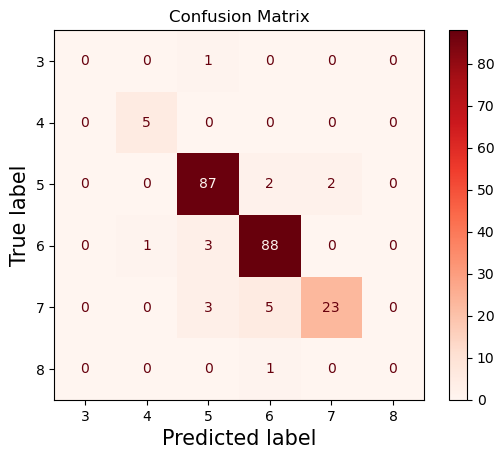

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       0.93      0.96      0.94        91
           6       0.92      0.96      0.94        92
           7       0.92      0.74      0.82        31
           8       0.00      0.00      0.00         1

    accuracy                           0.92       221
   macro avg       0.60      0.61      0.60       221
weighted avg       0.91      0.92      0.91       221



In [299]:
o_best_reg_accuracy = regression_accuracy(o_best_svr_model, o_x_test, o_y_test, 1, quality_list)

### Feature Selection

#### Manual Selection Based on Most Number of Outliers

In [303]:
o_r_default_svr_model = make_pipeline(StandardScaler(), SVR()).fit(o_r_x, o_r_y)

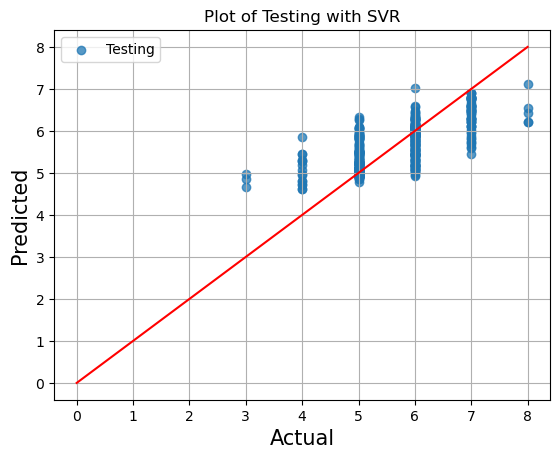

MSE on Test Set: 0.30736697300726484
R-squared on Test Data: 0.52591
Mean Absolute Deviation (MAD) on Test Set: 0.46284285505273626


In [340]:
o_r_mse, o_r_r2, o_r_mad = plot_pred_vs_actual(o_r_x, o_r_y, o_r_x_test, o_r_y_test, o_r_default_svr_model, 'SVR')

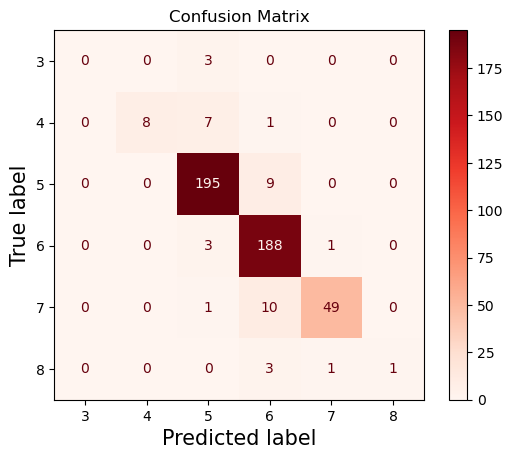

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.50      0.67        16
           5       0.93      0.96      0.94       204
           6       0.89      0.98      0.93       192
           7       0.96      0.82      0.88        60
           8       1.00      0.20      0.33         5

    accuracy                           0.92       480
   macro avg       0.80      0.58      0.63       480
weighted avg       0.92      0.92      0.91       480



In [305]:
o_r_reg_accuracy = regression_accuracy(o_r_default_svr_model, o_r_x_test, o_r_y_test, 1, quality_list)

In [191]:
o_r_svr_best_model = random_search_SVR(SVR, 'svr', 5, o_r_x, o_r_y, o_r_x_test, o_r_y_test, r_svr_ep, r_svr_gamma)

RandomizedSearchCV took 0.80 seconds for 5 candidates parameter settings.
Best Parameters:
 {'svr__epsilon': 0.11556098116685112, 'svr__gamma': 0.0021837132509680414, 'svr__kernel': 'rbf'}


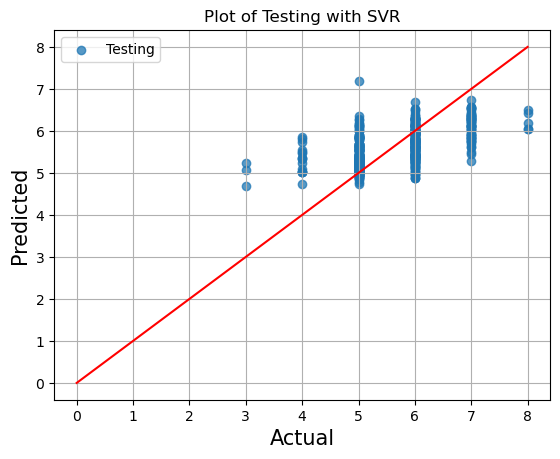

MSE on Test Set: 0.43369890487023
R-squared on Test Data: 0.33105
Mean Absolute Deviation (MAD) on Test Set: 0.37406336204983953


In [341]:
o_r_random_mse, o_r_random_r2, o_r_random_mad = plot_pred_vs_actual(o_r_x, o_r_y, o_r_x_test, o_r_y_test, 
                                                                    o_r_svr_best_model, 'SVR')

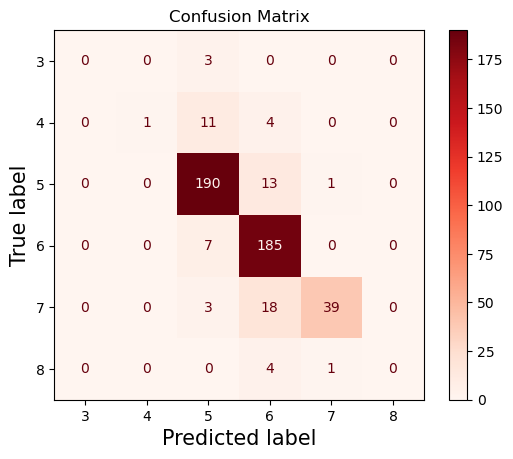

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.06      0.12        16
           5       0.89      0.93      0.91       204
           6       0.83      0.96      0.89       192
           7       0.95      0.65      0.77        60
           8       0.00      0.00      0.00         5

    accuracy                           0.86       480
   macro avg       0.61      0.43      0.45       480
weighted avg       0.86      0.86      0.84       480



In [306]:
o_r_reg_best_accuracy = regression_accuracy(o_r_svr_best_model, o_r_x_test, o_r_y_test, 1, quality_list)

####  PCA

In [308]:
o_pca_default_svr_model = make_pipeline(StandardScaler(), SVR()).fit(o_pca_x_train, o_pca_y_train)

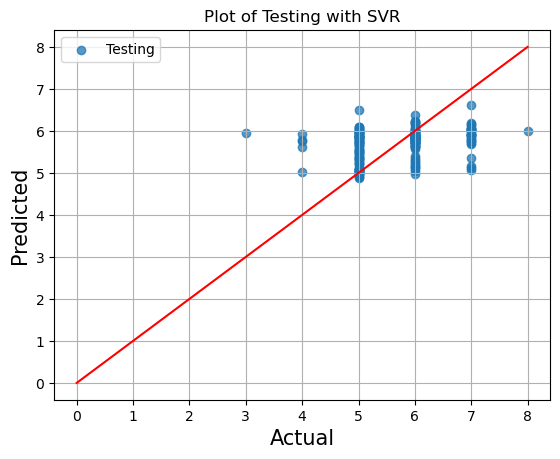

MSE on Test Set: 0.5879394515102633
R-squared on Test Data: 0.07357
Mean Absolute Deviation (MAD) on Test Set: 0.2929565119325389


In [342]:
o_pca_mse, o_pca_r2, o_pca_mad = plot_pred_vs_actual(o_pca_x_train, o_pca_y_train, o_pca_x_test, o_pca_y_test, 
                                                     o_pca_default_svr_model, 'SVR')

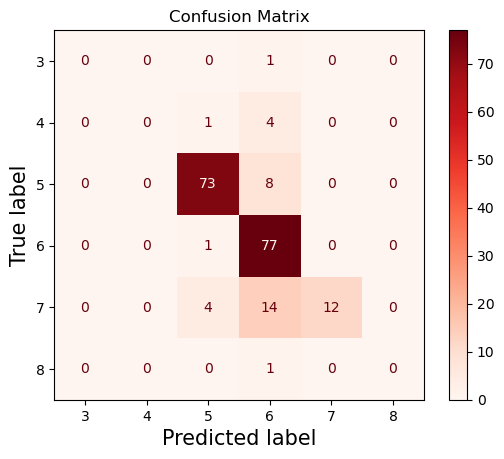

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.92      0.90      0.91        81
           6       0.73      0.99      0.84        78
           7       1.00      0.40      0.57        30
           8       0.00      0.00      0.00         1

    accuracy                           0.83       196
   macro avg       0.44      0.38      0.39       196
weighted avg       0.83      0.83      0.80       196



In [310]:
o_pca_reg_accuracy = regression_accuracy(o_pca_default_svr_model, o_pca_x_test, o_pca_y_test, 1, quality_list)

In [193]:
o_pca_svr_best_model = random_search_SVR(SVR, 'svr', 5, o_pca_x_train, o_pca_y_train, o_pca_x_test, o_pca_y_test, 
                                           pca_svr_ep, pca_svr_gamma)

RandomizedSearchCV took 0.18 seconds for 5 candidates parameter settings.
Best Parameters:
 {'svr__epsilon': 0.04675171741998763, 'svr__gamma': 0.02008720871882654, 'svr__kernel': 'linear'}


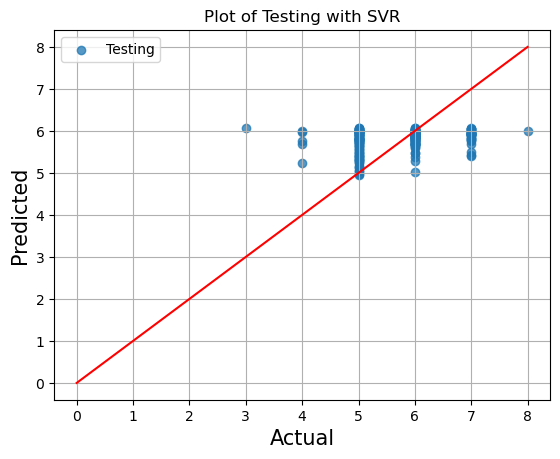

MSE on Test Set: 0.6086997890538165
R-squared on Test Data: 0.04086
Mean Absolute Deviation (MAD) on Test Set: 0.19397763809220467


In [343]:
o_pca_best_mse, o_pca_best_r2, o_pca_best_mad = plot_pred_vs_actual(o_pca_x_train, o_pca_y_train, o_pca_x_test, o_pca_y_test, 
                                                     o_pca_svr_best_model, 'SVR')

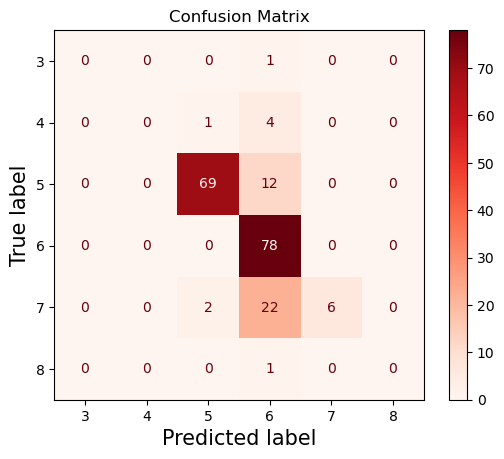

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.96      0.85      0.90        81
           6       0.66      1.00      0.80        78
           7       1.00      0.20      0.33        30
           8       0.00      0.00      0.00         1

    accuracy                           0.78       196
   macro avg       0.44      0.34      0.34       196
weighted avg       0.81      0.78      0.74       196



In [358]:
o_pca_reg_best_accuracy = regression_accuracy(o_pca_svr_best_model, o_pca_x_test, o_pca_y_test, 1, quality_list)

# SUMMARY

##### Data

In [369]:
accuracies_data = {
    'Experiment': ['Experiment 1', 'Experiment 1', 'Experiment 2', 'Experiment 2'],
    'Model': ['Default Model', 'Optimized Model', 'Default Model', 'Optimized Model'],
    'Original Data': [accuracy, grid_accuracy if grid_accuracy > random_accuracy else random_accuracy, 
                      o_accuracy, o_grid_accuracy if o_grid_accuracy > o_best_accuracy else o_best_accuracy],
    'Manual Selection': [r_accuracy, r_best_accuracy, o_accuracy, o_r_best_accuracy],
    'PCA': [pca_accuracy, pca_best_accuracy, o_r_accuracy, o_pca_best_accuracy]
}

Weighted_Average_Accuracies = pd.DataFrame(accuracies_data)

In [370]:
mse_data = {
    'Experiment': ['Experiment 1', 'Experiment 1', 'Experiment 1', 'Experiment 2', 'Experiment 2'],
    'Model': ['Default Model', 'Grid Search Model', 'Random Search', 'Default Model', 'Optimized Model'],
    'Original Data': [mse, grid_mse, random_mse, o_mse, o_random_mse],
    'Manual Selection': [r_mse, r_grid_mse, r_random_mse, o_r_mse, o_r_random_mse],
    'PCA': [pca_mse, pca_grid_mse, pca_random_mse, o_pca_mse, o_pca_best_mse]
}

Mean_Square_Error = pd.DataFrame(mse_data)

In [371]:
r2_data = {
    'Experiment': ['Experiment 1', 'Experiment 1', 'Experiment 1', 'Experiment 2', 'Experiment 2'],
    'Model': ['Default Model', 'Grid Search Model', 'Random Search', 'Default Model', 'Optimized Model'],
    'Original Data': [r2, grid_r2, random_r2, o_r2, o_random_r2],
    'Manual Selection': [r_r2, r_grid_r2, r_random_r2, o_r_r2, o_r_random_r2],
    'PCA': [pca_r2, pca_grid_r2, pca_random_r2, o_pca_r2, o_pca_best_r2]
}

R_Squared = pd.DataFrame(r2_data)

In [372]:
mad_data = {
    'Experiment': ['Experiment 1', 'Experiment 1', 'Experiment 1', 'Experiment 2', 'Experiment 2'],
    'Model': ['Default Model', 'Grid Search Model', 'Random Search', 'Default Model', 'Optimized Model'],
    'Original Data': [mad, grid_mad, random_mad, o_mad, o_random_mad],
    'Manual Selection': [r_mad, r_grid_mad, r_random_mad, o_r_mad, o_r_random_mad],
    'PCA': [pca_mad, pca_grid_mad, pca_random_mad, o_pca_mad, o_pca_best_mad]
}

Mean_Absolute_Deviation = pd.DataFrame(mad_data)

In [373]:
reg_acc_data = {
    'Experiment': ['Experiment 1', 'Experiment 1', 'Experiment 1', 'Experiment 2', 'Experiment 2'],
    'Model': ['Default Model', 'Grid Search Model', 'Random Search', 'Default Model', 'Optimized Model'],
    'Original Data': [reg_accuracy, reg_grid_accuracy, reg_best_accuracy, o_reg_accuracy, o_best_reg_accuracy],
    'Manual Selection': [reg_r_accuracy, reg_r_grid_accuracy, reg_r_best_accuracy , o_r_reg_accuracy, o_r_reg_best_accuracy],
    'PCA': [pca_reg_accuracy, pca_reg_grid_accuracy, reg_pca_best_accuracy, o_pca_reg_accuracy, o_pca_reg_best_accuracy]
}

Regression_Accuracy = pd.DataFrame(reg_acc_data)

### EDA 

    In this problem, we conducted classification and regression on a highly imbalanced dataset.

    To understand the data behavior, exploratory data analysis was performed yielding the following insights:
        - There were no null values in the dataset; 
        - Box plots and manual calculations revealed significant outliers in almost all features, with some reaching up to 155 outliers, except for citric acid, which had only one outlier; 
        - Most features exhibited right-skewed distributions, indicating that values tended to taper off at higher values; and,
        - The histogram of target variables showed that qualities 5 and 6 were observed multiple times more frequently than other grades in the dataset.

    These insights suggest that while the dataset exhibits high variability due to outliers, the majority of ratings fall within the moderate range of 5-6, possibly indicating how critiques tend to avoid extreme grades like 3 and 8 during surveys.

### METHODOLOGY

#### Classification

    For the implementation, two sets of experiments were conducted: 
    1. Using the original dataset; and,
    2. Using a hybrid of undersampling-oversampling on the training data.

    Initially, a default SVC model was used to assess its classification power on the dataset. 
    Grid-search algorithm was then utilized with a semi-wide range of values to find optimal parameters. To further optimize, the random-search algorithm was then employed with a distribution near the parameters obtained from the grid search. As this experiment was conducted multiple times, to reduce time and computational cost on the final run, random-search was only performed with the one-vs-one multi-class strategy, which was deemed more effective for this problem than other strategies.

    For feature selection, two methods were implemented. Firstly, the manual removal of the two features with the most outliers exceeding a hundred datapoints, residual sugar, and chlorides. Secondly is principal component analysis, setting a goal variance of 0.999 arbitrarily since one feature, total sulfur dioxide, was already able to explain 0.94 of the variance alone.

    Subsequently, the classification on the modified training dataset was also perfomed. For undersampling, all outlier data points were retained to ensure that models that will be trained are robust to outliers. Additionally, a certain percentage of non-outliers were also retained to ensure enough generic data points were available, all while ensuring retention of the minority class.

    For oversampling, the classical version of SMOTE with default parameters was used.

#### Regression

    In the regression analysis, the approach mirrored that of the classification. The default SVR model was first utilized, followed by grid-search and then random-search optimization to determine the optimal parameters. The feature selection process remained consistent, utilizing the features selected from the classification problem.

### Results

####  Classification Result

In [374]:
Weighted_Average_Accuracies

,Experiment,Model,Original Data,Manual Selection,PCA
0,Experiment 1,Default Model,0.81,0.65,0.48
1,Experiment 1,Optimized Model,0.65,0.56,0.40
2,Experiment 2,Default Model,0.63,0.63,0.65
3,Experiment 2,Optimized Model,0.59,0.59,0.48


    The summarized table above illustrates the results of the classification method applied to the data. Due to the highly imbalanced nature of the data points, weighted average accuracy was used considering the number of data points for each class in the test data (note that data balancing was only applied to the training data).

    At first glance, the default model in experiment 1 already shows a very high 81% accuracy. However, further testing is recommended, as varying results could be obtained with different random states in the partitioning process.

    Upon further examination of the results, consistent accuracy was achieved with the manually selected features, demonstrating promising potential. This is also evident in the confusion matrix (refer to sections 2.1.4.1 and 2.2.4.1), which showed high classification scores for the extreme classes. Unfortunately, classical PCA did not yield consistent good results for both experiments.

    Regarding optimization, it can be observed that as accuracies tend to decrease, the proposed methodology of grid-search followed by random-search may not be effective. The classical flow of random-search for determining the optimal parameter range then application of grid-search may still be more effective for this problem.

#### Regression Results

In [375]:
Mean_Square_Error

,Experiment,Model,Original Data,Manual Selection,PCA
0,Experiment 1,Default Model,0.387969,0.307367,0.571954
1,Experiment 1,Grid Search Model,0.387969,0.403207,0.563781
2,Experiment 1,Random Search,0.443068,0.403207,0.600135
3,Experiment 2,Default Model,0.363490,0.307367,0.587939
4,Experiment 2,Optimized Model,0.364333,0.433699,0.608700


    Similar conclusions can be drawn from the summarized table for mean square error, indicating that the optimization method may not be sufficient, as the error tends to increase compared to the default SVR model.

In [376]:
R_Squared

,Experiment,Model,Original Data,Manual Selection,PCA
0,Experiment 1,Default Model,0.401586,0.525909,0.117802
1,Experiment 1,Grid Search Model,0.401586,0.378083,0.130410
2,Experiment 1,Random Search,0.316601,0.378083,0.074336
3,Experiment 2,Default Model,0.392305,0.525909,0.073573
4,Experiment 2,Optimized Model,0.390895,0.331051,0.040861


    Additionally, the R-squared values were generally low, except for the model which employed manual feature selection, highlighting its potential effectiveness. Conversely, models using PCA demonstrated poor results, suggesting that all features, despite being arbitrarily considered for the experiment as mentioned by the data source, are necessary for addressing the problem effectively.

In [377]:
Mean_Absolute_Deviation

,Experiment,Model,Original Data,Manual Selection,PCA
0,Experiment 1,Default Model,0.440062,0.462843,0.341924
1,Experiment 1,Grid Search Model,0.440062,0.377595,0.307888
2,Experiment 1,Random Search,0.377978,0.377595,0.198120
3,Experiment 2,Default Model,0.450653,0.462843,0.292957
4,Experiment 2,Optimized Model,0.458791,0.374063,0.193978


    Regarding the mean absolute deviation (MAD), which indicates the distribution of data points from the mean, higher MAD values were mostly obtained from experiment 2 and on data where features were manually selected. Compared to the experiment with an MAD of 0.44 for its SVM regression-classification on the red wine dataset, the highest MAD of 0.46 was obtained, but it was subsequently reduced to 0.37 after hyperparameter tuning.

In [378]:
Regression_Accuracy

,Experiment,Model,Original Data,Manual Selection,PCA
0,Experiment 1,Default Model,0.88,0.92,0.82
1,Experiment 1,Grid Search Model,0.88,0.87,0.85
2,Experiment 1,Random Search,0.88,0.87,0.82
3,Experiment 2,Default Model,0.91,0.92,0.83
4,Experiment 2,Optimized Model,0.91,0.86,0.81


    Lastly, for a direct comparison with the paper, a tolerance was applied to the prediction of the regression test, although this effectively converts the experiment into a classification task as we are producing accuracies. Nevertheless, a tolerance (which considers the predictions of the model correct if the absolute difference with the correct class is below the tolerance) of 1, the highest set in the paper, was used. TThe highest accuracy was obtained for both experiments on data where manual selection was employed, which was slightly higher than the paper's reported accuracy of 89% on the red wine dataset.


    From these experiments, several conclusions can be drawn:

    1. Both for classification and regression, poor results can be expected unless necessary preprocessing is performed on the data points or more effective models for highly imbalanced data, such as tree-search-based or ensemble models, are used.

    2. Results are easier to interpret for classification, as demonstrated in the paper, which transformed their regression into a classification problem. In real-world applications, people are likely to ignore decimal differences in regression results and base their judgments on integer classes. In the future for this case of wine quality, people may likely to prefer to categorize it as "good" or "bad" rather than assigning it a specific numerical grade.

    3. While the grid-search followed by random-search hyperparameter tuning method did not yield considerable results in this study, it still holds potential for future use. Finding optimal hyperparameters can be challenging, and these methods may prove useful when precise and specific hyperparameter settings are difficult to determine through grid-search alone.